In [ ]:
import pandas as pd

In [38]:
import pandas as pd

# Define the path to your Excel file (update the filename as needed)
file_path = './data/raw_data.csv'

# Read the Excel file with headers on row 3 and the first column as row index
df = pd.read_csv(file_path, header=2, index_col=0)

# Display the first few rows to verify the structure

In [42]:
df = df.head()

In [45]:
df

2014__Average Benchmark Premium  \
Location                                        
Alabama                                 256.0   
Maine                                   325.0   
New York                                343.0   
North Dakota                            284.0   
Tennessee                               197.0   

              2015__Average Benchmark Premium  \
Location                                        
Alabama                                 264.0   
Maine                                   321.0   
New York                                380.0   
North Dakota                            303.0   
Tennessee                               233.0   

              2016__Average Benchmark Premium  \
Location                                        
Alabama                                 297.0   
Maine                                   335.0   
New York                                393.0   
North Dakota                            330.0   
Tennessee                               287.0   

              2017__Average Benchmark Premium  \
Location                                        
Alabama                                 469.0   
Maine                                   385.0   
New York                                454.0   
North Dakota                            352.0   
Tennessee                               472.0   

              2018__Average Benchmark Premium  \
Location                                        
Alabama                                 558.0   
Maine                                   588.0   
New York                                506.0   
North Dakota                            377.0   
Tennessee                               743.0   

              2019__Average Benchmark Premium  \
Location                                        
Alabama                                 546.0   
Maine                                   544.0   
New York                                569.0   
North Dakota                            457.0   
Tennessee                               548.0   

              2020__Average Benchmark Premium  \
Location                                        
Alabama                                 553.0   
Maine                                   513.0   
New York                                610.0   
North Dakota                            383.0   
Tennessee                               511.0   

              2021__Average Benchmark Premium  \
Location                                        
Alabama                                 590.0   
Maine                                   440.0   
New York                                597.0   
North Dakota                            493.0   
Tennessee                               466.0   

              2022__Average Benchmark Premium  \
Location                                        
Alabama                                 597.0   
Maine                                   427.0   
New York                                592.0   
North Dakota                            497.0   
Tennessee                               445.0   

              2023__Average Benchmark Premium  \
Location                                        
Alabama                                 567.0   
Maine                                   457.0   
New York                                627.0   
North Dakota                            475.0   
Tennessee                               473.0   

              2024__Average Benchmark Premium 2025__Average Benchmark Premium  
Location                                                                       
Alabama                                 564.0                            $535  
Maine                                   515.0                            $546  
New York                                736.0                            $790  
North Dakota                            486.0                            $537  
Tennessee                               501.0                            $516

In [51]:
import pandas as pd
import re

# Path to your CSV file
file_path = './data/raw_data.csv'

# 1. Read CSV with headers on row 3 (header=2) and first column as index_col
df = pd.read_csv(file_path, header=2, index_col=0)
df = df.head()
# 2. Remove dollar signs
df = df.replace({'\$': ''}, regex=True)

# 3. Convert columns to numeric where possible
df = df.apply(pd.to_numeric, errors='ignore')

# 4. Extract numeric years from column headers (if they are strings like "2020$" etc.)
def extract_year(col):
    match = re.match(r'(\d+)', str(col))
    if match:
        return int(match.group(1))
    else:
        return col

# Rename columns to the extracted year (or leave them if no match)
new_columns = {col: extract_year(col) for col in df.columns}
df.rename(columns=new_columns, inplace=True)

# 5. Reshape from wide to long (tidy format):
#    - Row index (state) is currently the index, so let's bring it back as a column
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'state'})  # If your index is 'State', rename accordingly

#    - Melt the DataFrame so each row is { state, year, value }
df_melted = df.melt(id_vars=df.columns[0], var_name='year', value_name='value')
# Now df_melted has columns: [ state, year, value ]

# 6. Export to JSON
df_melted.to_json('clean_data.json', orient='records')

print("Clean data exported to clean_data.json")


Clean data exported to clean_data.json


<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jmcel\AppData\Local\Temp\ipykernel_46064\2957368481.py:11: SyntaxWarning: invalid escape sequence '\$'
  df = df.replace({'\$': ''}, regex=True)
C:\Users\jmcel\AppData\Local\Temp\ipykernel_46064\2957368481.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [52]:
df_melted

Location  year  value
0        Alabama  2014  256.0
1          Maine  2014  325.0
2       New York  2014  343.0
3   North Dakota  2014  284.0
4      Tennessee  2014  197.0
5        Alabama  2015  264.0
6          Maine  2015  321.0
7       New York  2015  380.0
8   North Dakota  2015  303.0
9      Tennessee  2015  233.0
10       Alabama  2016  297.0
11         Maine  2016  335.0
12      New York  2016  393.0
13  North Dakota  2016  330.0
14     Tennessee  2016  287.0
15       Alabama  2017  469.0
16         Maine  2017  385.0
17      New York  2017  454.0
18  North Dakota  2017  352.0
19     Tennessee  2017  472.0
20       Alabama  2018  558.0
21         Maine  2018  588.0
22      New York  2018  506.0
23  North Dakota  2018  377.0
24     Tennessee  2018  743.0
25       Alabama  2019  546.0
26         Maine  2019  544.0
27      New York  2019  569.0
28  North Dakota  2019  457.0
29     Tennessee  2019  548.0
30       Alabama  2020  553.0
31         Maine  2020  513.0
32      New York  2020  610.0
33  North Dakota  2020  383.0
34     Tennessee  2020  511.0
35       Alabama  2021  590.0
36         Maine  2021  440.0
37      New York  2021  597.0
38  North Dakota  2021  493.0
39     Tennessee  2021  466.0
40       Alabama  2022  597.0
41         Maine  2022  427.0
42      New York  2022  592.0
43  North Dakota  2022  497.0
44     Tennessee  2022  445.0
45       Alabama  2023  567.0
46         Maine  2023  457.0
47      New York  2023  627.0
48  North Dakota  2023  475.0
49     Tennessee  2023  473.0
50       Alabama  2024  564.0
51         Maine  2024  515.0
52      New York  2024  736.0
53  North Dakota  2024  486.0
54     Tennessee  2024  501.0
55       Alabama  2025  535.0
56         Maine  2025  546.0
57      New York  2025  790.0
58  North Dakota  2025  537.0
59     Tennessee  2025  516.0

In [65]:
df.head()

year  ValueB  ValueC
0  1999  2196.0  5791.0
1  2000  2471.0  6438.0
2  2001  2689.0  7061.0
3  2002  3083.0  8003.0
4  2003  3383.0  9068.0

In [64]:
import pandas as pd
import re

# Read the Excel file from the sheet 'Table 1.12'
df = pd.read_excel('./data/tables01.xlsx', sheet_name='Figure 1.12',header=3)

# Assume the columns are named (or located) as:
# Column A: Year, Column B: ValueB, Column C: ValueC
# If not, adjust the column names or positions accordingly.
df = df.rename(columns={df.columns[0]: 'year', df.columns[1]: 'ValueB', df.columns[2]: 'ValueC'})

# Remove '$' and commas, then convert columns to numeric
df['ValueB'] = df['ValueB'].replace('[\$*,]', '', regex=True).astype(float)
df['ValueC'] = df['ValueC'].replace('[\$*,]', '', regex=True).astype(float)

# Optionally, inspect the dataframe
print(df.head())

# Export to JSON (each row as a record)
df.to_json('table_1_12.json', orient='records')
print("Exported JSON data to table_1_12.json")


   year  ValueB  ValueC
0  1999  2196.0  5791.0
1  2000  2471.0  6438.0
2  2001  2689.0  7061.0
3  2002  3083.0  8003.0
4  2003  3383.0  9068.0
Exported JSON data to table_1_12.json


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jmcel\AppData\Local\Temp\ipykernel_46064\3860339448.py:13: SyntaxWarning: invalid escape sequence '\$'
  df['ValueB'] = df['ValueB'].replace('[\$*,]', '', regex=True).astype(float)
C:\Users\jmcel\AppData\Local\Temp\ipykernel_46064\3860339448.py:14: SyntaxWarning: invalid escape sequence '\$'
  df['ValueC'] = df['ValueC'].replace('[\$*,]', '', regex=True).astype(float)


              2014.0  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  \
Location                                                                       
Alabama        256.0   264.0   297.0   469.0   558.0   546.0   553.0   590.0   
Maine          325.0   321.0   335.0   385.0   588.0   544.0   513.0   440.0   
New York       343.0   380.0   393.0   454.0   506.0   569.0   610.0   597.0   
North Dakota   284.0   303.0   330.0   352.0   377.0   457.0   383.0   493.0   
Tennessee      197.0   233.0   287.0   472.0   743.0   548.0   511.0   466.0   

              2022.0  2023.0  2024.0  2025.0  
Location                                      
Alabama        597.0   567.0   564.0     535  
Maine          427.0   457.0   515.0     546  
New York       592.0   627.0   736.0     790  
North Dakota   497.0   475.0   486.0     537  
Tennessee      445.0   473.0   501.0     516  


<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jmcel\AppData\Local\Temp\ipykernel_46064\251812889.py:11: SyntaxWarning: invalid escape sequence '\$'
  df = df.replace({'\$': ''}, regex=True)
C:\Users\jmcel\AppData\Local\Temp\ipykernel_46064\251812889.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


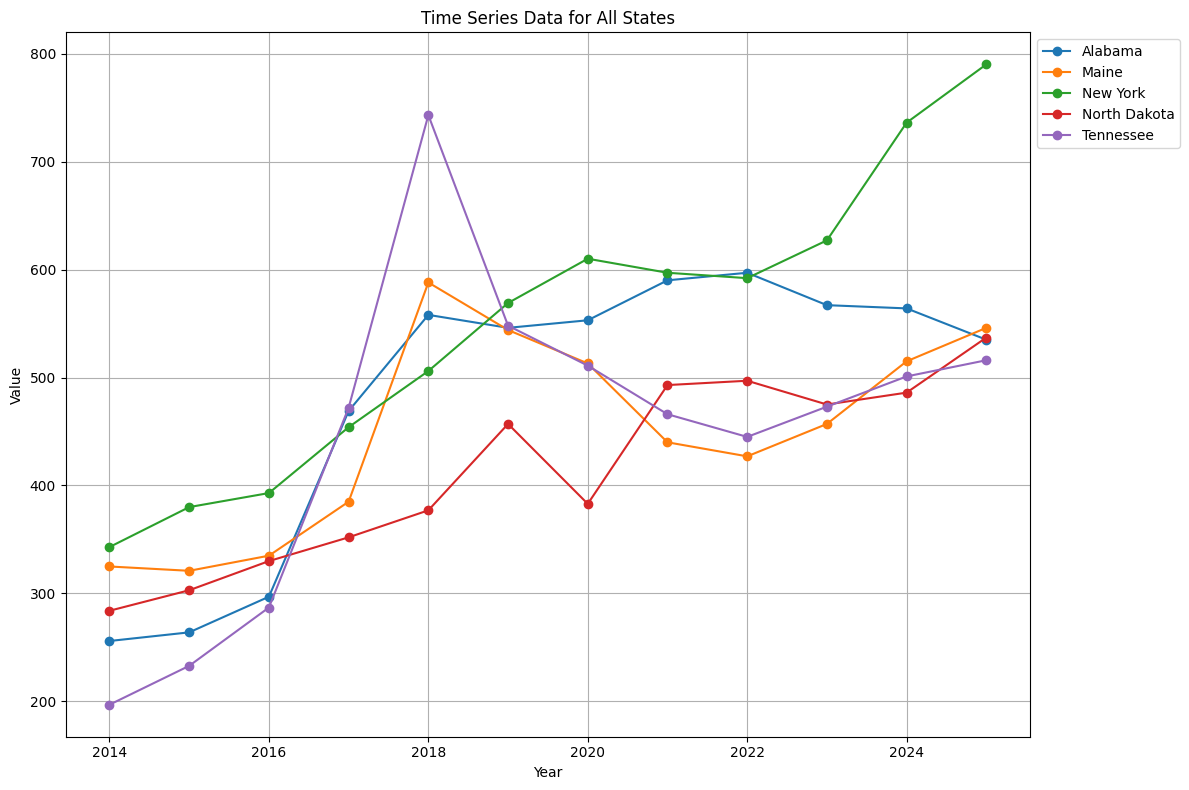

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your Excel file
file_path = './data/raw_data.csv'

# Read the Excel file with headers on row 3 and the first column as row index
df = pd.read_csv(file_path, header=2, index_col=0)
df = df.head()
# Optionally, ensure that the column labels (years) are numeric
df = df.replace({'\$': ''}, regex=True)

# Optionally, convert columns to numeric where possible (non-numeric columns will remain unchanged)
df = df.apply(pd.to_numeric, errors='ignore')

# Define a function to extract the numeric year from a column header string.
def extract_year(col):
    # Use a regular expression to match digits at the beginning of the string.
    match = re.match(r'(\d+)', str(col))
    if match:
        return float(match.group(1))
    else:
        return col

# Create a mapping of original column names to the extracted numeric year (if available)
new_columns = {col: extract_year(col) for col in df.columns}
df.rename(columns=new_columns, inplace=True)

# Optionally, print the first few rows to verify the header changes and dollar sign removal
print(df.head())

# Plot the time series data for all states, with years on the x-axis and state values as lines.
plt.figure(figsize=(12, 8))
for state, row in df.iterrows():
    plt.plot(df.columns, row, marker='o', label=state)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Time Series Data for All States")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import os
import pandas as pd
from openpyxl import load_workbook

# Base directory where state folders are located
dest_dir = r"C:\Users\jmcel\Documents\repos\weegi\data"

# List of states/folders to process
target_states = ["Florida", "New_York", "North_Carolina", "Pennsylvania", "California", "Michigan"]

data_list = []

for state in target_states:
    state_folder = os.path.join(dest_dir, state)
    if not os.path.isdir(state_folder):
        print(f"Folder for state {state} does not exist, skipping.")
        continue
    
    # Process each Excel file in the state's folder
    for file in os.listdir(state_folder):
        if file.endswith(".xlsx"):
            # Assuming the filename is like "StateNameYYYY.xlsx"
            filename_without_ext = os.path.splitext(file)[0]
            # Remove the state name from the filename to isolate the year (strip any extra whitespace)
            year_str = filename_without_ext.replace(state, "").strip()
            try:
                year = int(year_str)
            except ValueError:
                print(f"Could not parse year from filename {file} in folder {state}")
                continue
            
            # Only process files for the years 2014 to 2022
            if year < 2014 or year > 2022:
                continue
            
            file_path = os.path.join(state_folder, file)
            wb = load_workbook(file_path, data_only=True)
            
            # Extract from sheet 'Pt 1 Summary of Data'
            if 'Pt 1 Summary of Data' in wb.sheetnames:
                sheet1 = wb['Pt 1 Summary of Data']
                pt1_E5   = sheet1['E5'].value
                pt1_E12  = sheet1['E12'].value
                pt1_J5   = sheet1['J5'].value
                pt1_J12  = sheet1['J12'].value
                pt1_O5   = sheet1['O5'].value
                pt1_O12  = sheet1['O12'].value
            else:
                print(f"Sheet 'Pt 1 Summary of Data' not found in {file_path}")
                continue

            # Extract from sheet 'Pt 2 Premium and Claims'
            if 'Pt 2 Premium and Claims' in wb.sheetnames:
                sheet2 = wb['Pt 2 Premium and Claims']
                pt2_E24  = sheet2['E24'].value
                pt2_J24  = sheet2['J24'].value
                pt2_O24  = sheet2['O24'].value
            else:
                print(f"Sheet 'Pt 2 Premium and Claims' not found in {file_path}")
                continue

            # Store the extracted values along with state and year info
            data_list.append({
                'state': state,
                'year': year,
                'Pt1_E5': pt1_E5,
                'Pt1_E12': pt1_E12,
                'Pt1_J5': pt1_J5,
                'Pt1_J12': pt1_J12,
                'Pt1_O5': pt1_O5,
                'Pt1_O12': pt1_O12,
                'Pt2_E24': pt2_E24,
                'Pt2_J24': pt2_J24,
                'Pt2_O24': pt2_O24,
            })

# Create the DataFrame and sort by state and year
df = pd.DataFrame(data_list)
df.sort_values(by=['state', 'year'], inplace=True)

# Optionally, convert the year to a datetime (using January 1 of that year) and set it as the index
df['date'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('date', inplace=True)

print(df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


                     state  year       Pt1_E5      Pt1_E12        Pt1_J5  \
date                                                                       
2014-01-01      California  2014   5989028.92   6042728.30  2.118598e+08   
2015-01-01      California  2015   4569339.50   4845846.23  2.207662e+08   
2016-01-01      California  2016   4369352.38   4285516.25  3.943284e+08   
2017-01-01      California  2017   3486978.67   3121737.46  5.771619e+08   
2018-01-01      California  2018   6378409.93   4761559.26  6.933064e+08   
2019-01-01      California  2019    173003.49    182307.44  7.480057e+08   
2020-01-01      California  2020     54367.11     11285.00  3.553286e+08   
2021-01-01      California  2021         0.00         0.00 -5.070165e+06   
2022-01-01      California  2022         0.00       -75.44 -1.187490e+06   
2014-01-01         Florida  2014  34632832.39  42186280.01  6.905633e+08   
2015-01-01         Florida  2015  21730766.92  17434902.57  5.563818e+08   
2016-01-01  

Sheet 'Pt 3 MLR and Rebate Calculation' not found in C:\Users\jmcel\Documents\repos\weegi\data\Florida\Florida2011.xlsx


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Folder for New York does not exist, skipping.
Folder for North Carolina does not exist, skipping.
Sheet 'Pt 3 MLR and Rebate Calculation' not found in C:\Users\jmcel\Documents\repos\weegi\data\Pennsylvania\Pennsylvania2013.xlsx
Sheet 'Pt 3 MLR and Rebate Calculation' not found in C:\Users\jmcel\Documents\repos\weegi\data\Michigan\Michigan2011.xlsx


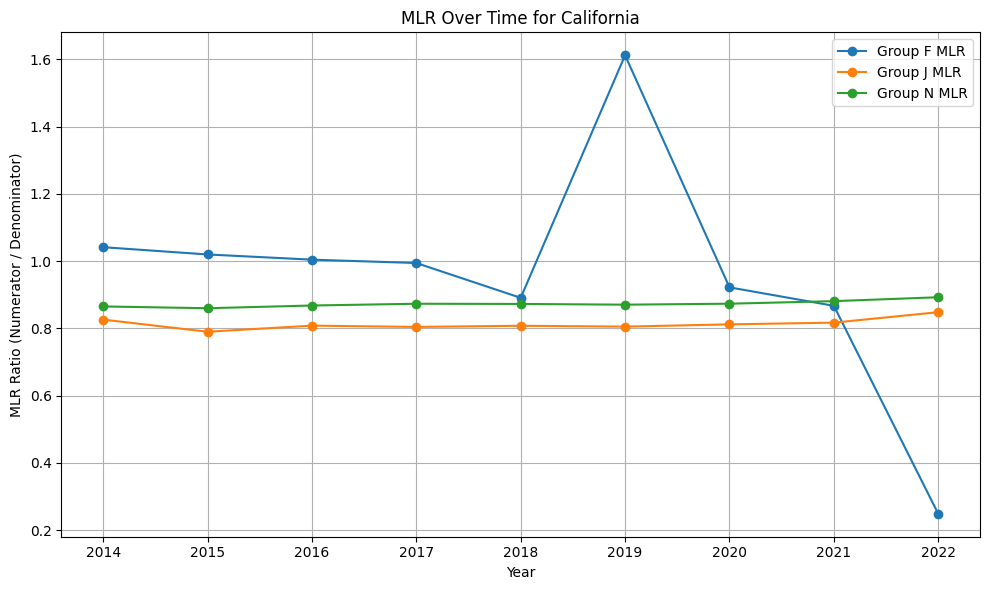

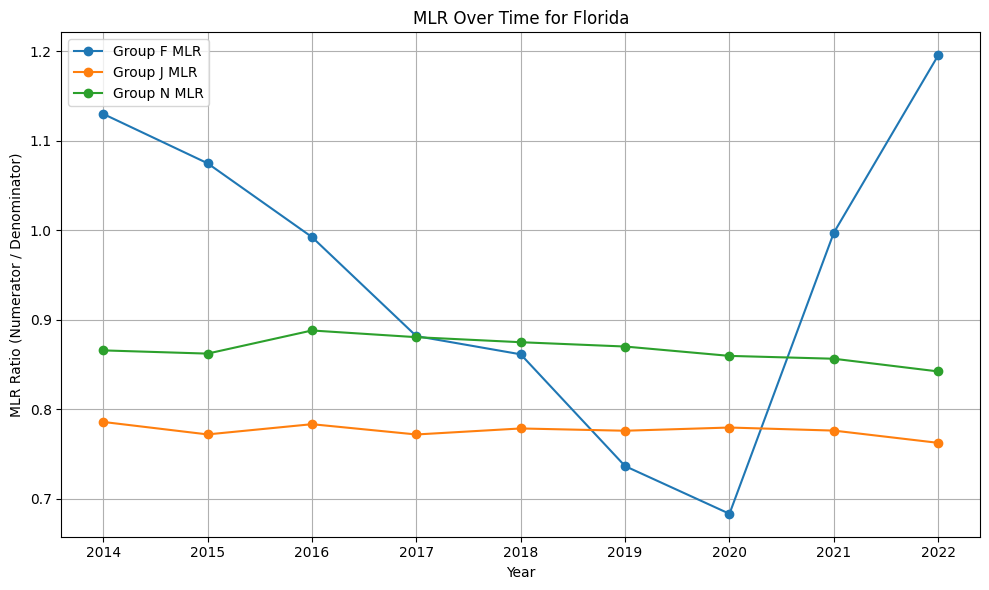

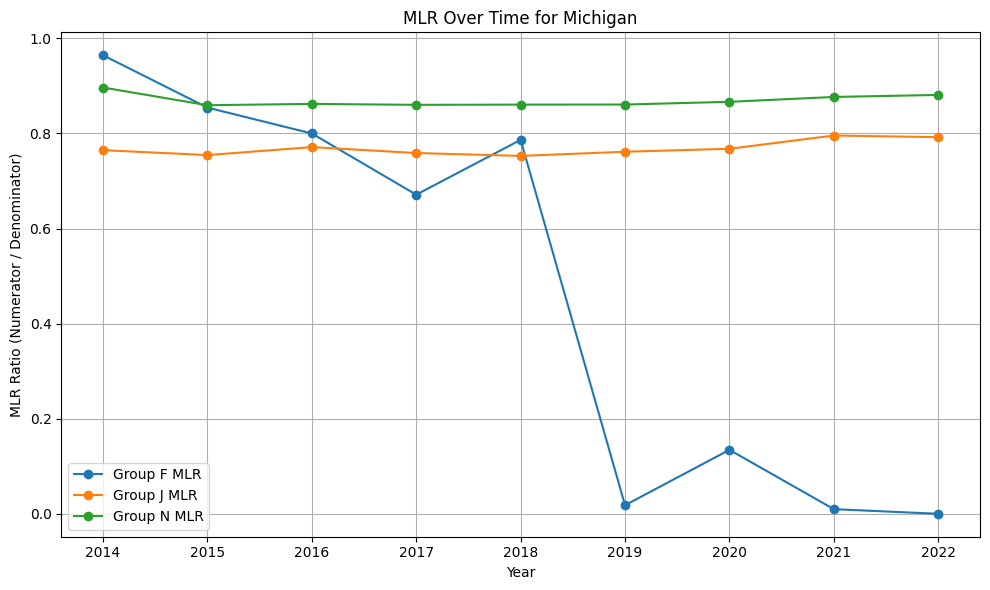

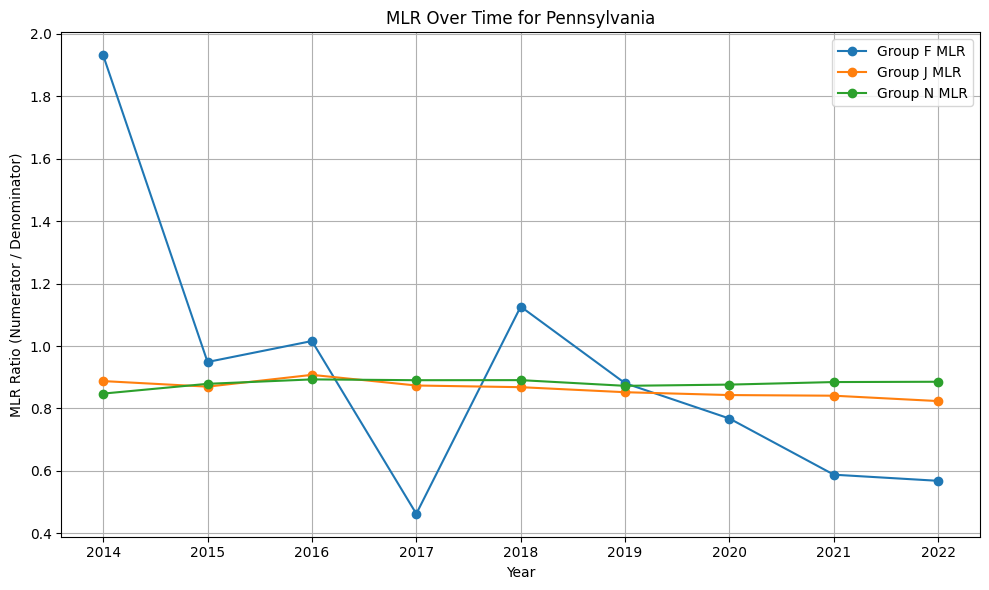

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook

# Base directory where state folders are located
dest_dir = r"C:\Users\jmcel\Documents\repos\weegi\data"

# List of target state folders
target_states = ["Florida", "New York", "North Carolina", "Pennsylvania", "California", "Michigan"]

mlr_data = []

for state in target_states:
    state_folder = os.path.join(dest_dir, state)
    if not os.path.isdir(state_folder):
        print(f"Folder for {state} does not exist, skipping.")
        continue

    # Loop through all Excel files in the state's folder
    for file in os.listdir(state_folder):
        if file.endswith(".xlsx"):
            # Assume filename is formatted like "StateNameYYYY.xlsx"
            filename = os.path.splitext(file)[0]
            year_str = filename.replace(state, "").strip()
            try:
                year = int(year_str)
            except ValueError:
                print(f"Could not parse year from {file} in folder {state}")
                continue

            file_path = os.path.join(state_folder, file)
            wb = load_workbook(file_path, data_only=True)
            
            if 'Pt 3 MLR and Rebate Calculation' not in wb.sheetnames:
                print(f"Sheet 'Pt 3 MLR and Rebate Calculation' not found in {file_path}")
                continue
            
            sheet = wb['Pt 3 MLR and Rebate Calculation']
            
            # For files from 2020 onward, numerator is on row 13; before that, row 12.
            if year >= 2020:
                num_F = sheet['F13'].value
                num_J = sheet['J13'].value
                num_N = sheet['N13'].value
            else:
                num_F = sheet['F12'].value
                num_J = sheet['J12'].value
                num_N = sheet['N12'].value
            
            # Denominator cells remain constant (F17, J17, N17)
            den_F = sheet['F17'].value
            den_J = sheet['J17'].value
            den_N = sheet['N17'].value
            
            # Calculate MLR ratios (safeguard against division by zero)
            mlr_F = num_F / den_F if den_F else np.nan
            mlr_J = num_J / den_J if den_J else np.nan
            mlr_N = num_N / den_N if den_N else np.nan
            
            mlr_data.append({
                'state': state,
                'year': year,
                'num_F': num_F,
                'den_F': den_F,
                'mlr_F': mlr_F,
                'num_J': num_J,
                'den_J': den_J,
                'mlr_J': mlr_J,
                'num_N': num_N,
                'den_N': den_N,
                'mlr_N': mlr_N,
            })

# Create a DataFrame with the collected MLR data and sort it
df_mlr = pd.DataFrame(mlr_data)
df_mlr.sort_values(by=['state', 'year'], inplace=True)
df_mlr['year'] = df_mlr['year'].astype(int)

# Graph the MLR metrics over time for each state
states = df_mlr['state'].unique()
for state in states:
    state_df = df_mlr[df_mlr['state'] == state]
    
    plt.figure(figsize=(10, 6))
    plt.plot(state_df['year'], state_df['mlr_F'], marker='o', label='Group F MLR')
    plt.plot(state_df['year'], state_df['mlr_J'], marker='o', label='Group J MLR')
    plt.plot(state_df['year'], state_df['mlr_N'], marker='o', label='Group N MLR')
    
    plt.title(f"MLR Over Time for {state}")
    plt.xlabel("Year")
    plt.ylabel("MLR Ratio (Numerator / Denominator)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


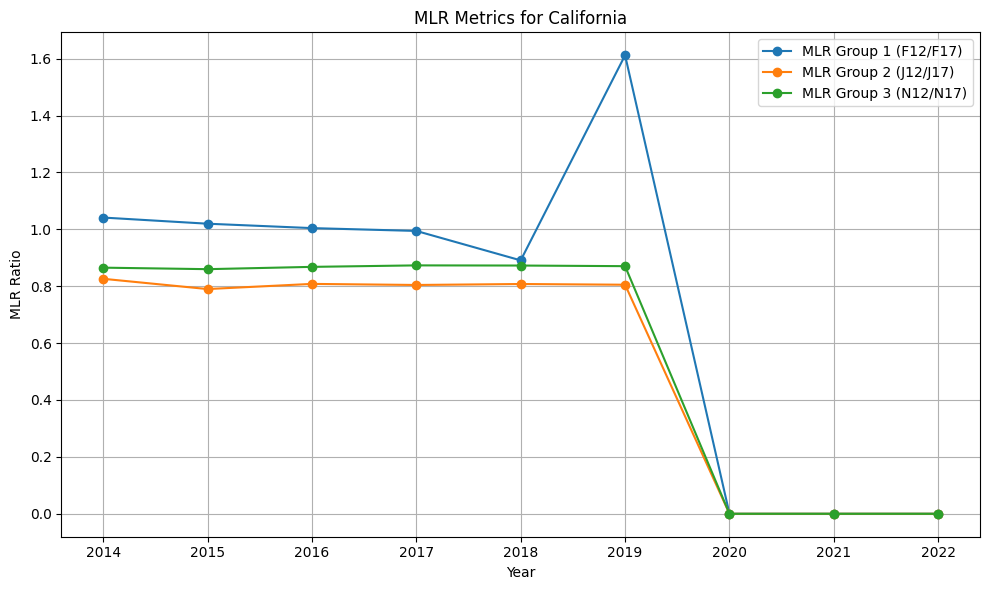

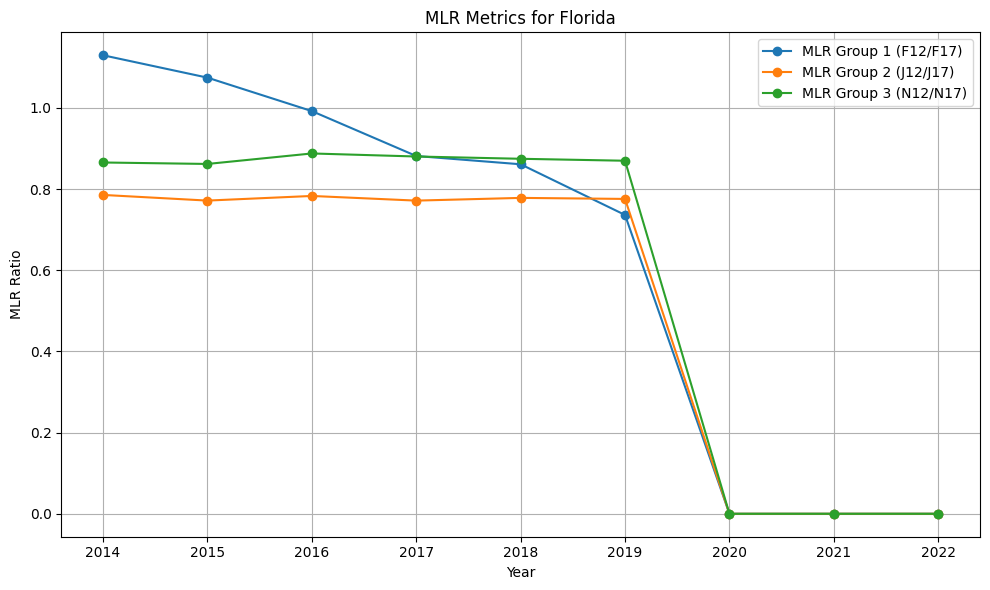

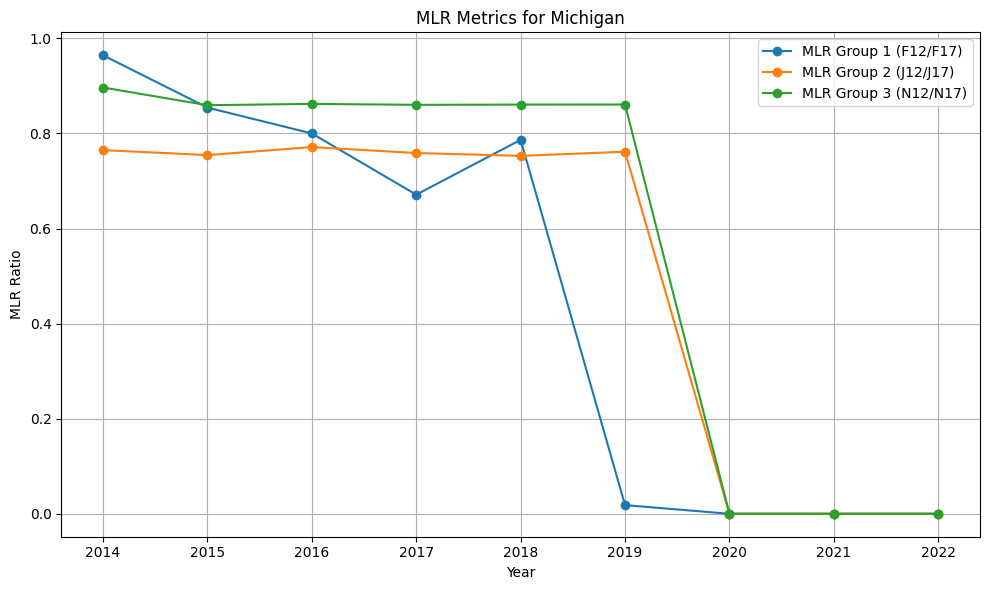

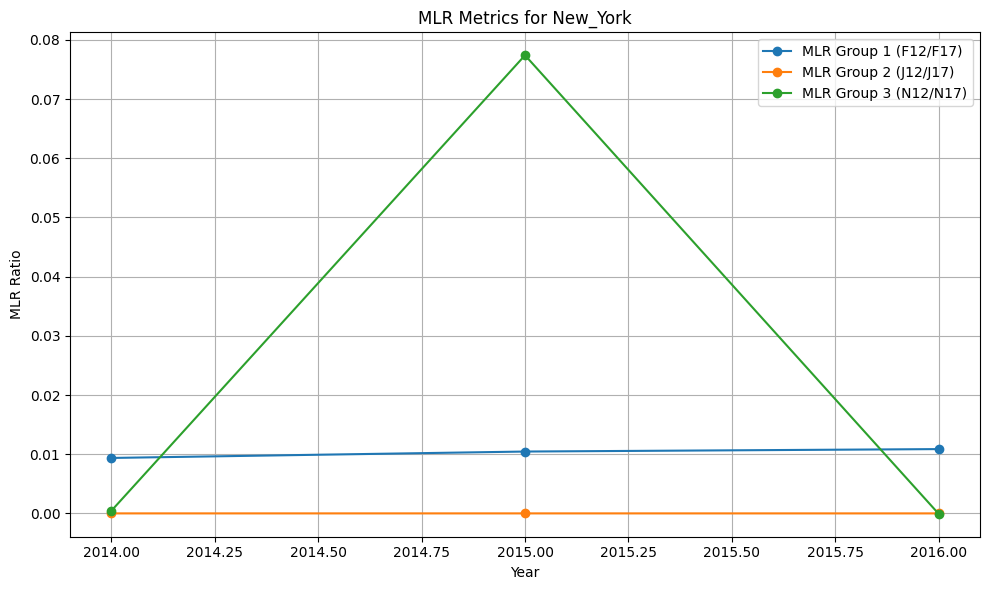

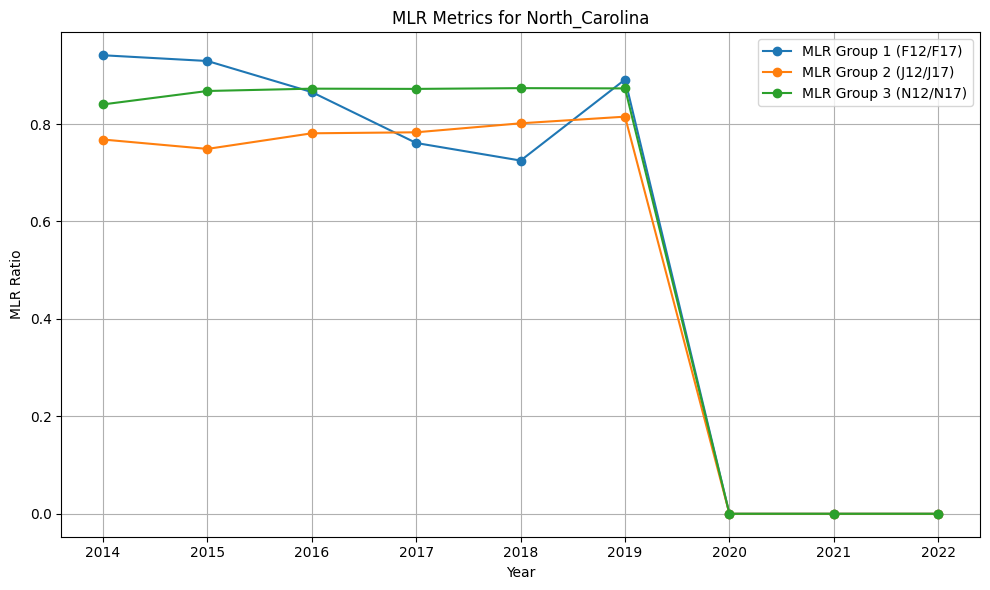

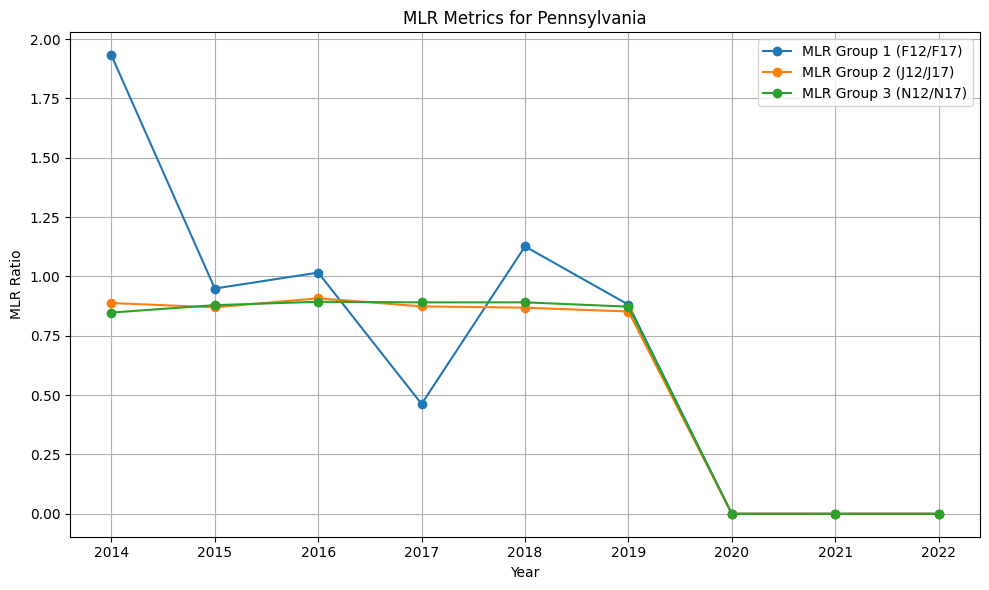

In [25]:
import os
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt

# Base directory where state folders are located
dest_dir = r"C:\Users\jmcel\Documents\repos\weegi\data" 

# List of target states (assuming these folders already exist)
target_states = ["Florida", "New_York", "North_Carolina", "Pennsylvania", "California", "Michigan"]

mlr_data_list = []

# Loop over each state folder
for state in target_states:
    state_folder = os.path.join(dest_dir, state)
    if not os.path.isdir(state_folder):
        print(f"Folder for state {state} does not exist, skipping.")
        continue

    # Process each Excel file in the state's folder
    for file in os.listdir(state_folder):
        if file.endswith(".xlsx"):
            # Assume filename format is like "StateNameYYYY.xlsx"
            filename_without_ext = os.path.splitext(file)[0]
            # Extract year by removing the state name from the filename
            year_str = filename_without_ext.replace(state, "").strip()
            try:
                year = int(year_str)
            except ValueError:
                print(f"Could not parse year from filename {file} in folder {state}")
                continue

            # Process only files for the years 2014 to 2022
            if year < 2014 or year > 2022:
                continue

            file_path = os.path.join(state_folder, file)
            wb = load_workbook(file_path, data_only=True)
            if 'Pt 3 MLR and Rebate Calculation' in wb.sheetnames:
                sheet = wb['Pt 3 MLR and Rebate Calculation']
                # Read the MLR numerator and denominator cells for the three groups
                try:
                    # Group 1: Cells F12 (numerator) and F17 (denom)
                    F12 = sheet['F12'].value
                    F17 = sheet['F17'].value
                    # Group 2: Cells J12 (numerator) and J17 (denom)
                    J12 = sheet['J12'].value
                    J17 = sheet['J17'].value
                    # Group 3: Cells N12 (numerator) and N17 (denom)
                    N12 = sheet['N12'].value
                    N17 = sheet['N17'].value
                except Exception as e:
                    print(f"Error reading cells in {file_path}: {e}")
                    continue

                # Compute the MLR ratios safely (avoid division by zero)
                mlr1 = F12 / F17 if F17 and F17 != 0 else None
                mlr2 = J12 / J17 if J17 and J17 != 0 else None
                mlr3 = N12 / N17 if N17 and N17 != 0 else None

                mlr_data_list.append({
                    'state': state,
                    'year': year,
                    'MLR1': mlr1,
                    'MLR2': mlr2,
                    'MLR3': mlr3
                })
            else:
                print(f"Sheet 'Pt 3 MLR and Rebate Calculation' not found in {file_path}")
                continue

# Create a DataFrame from the collected data and sort it
mlr_df = pd.DataFrame(mlr_data_list)
mlr_df.sort_values(by=['state', 'year'], inplace=True)
mlr_df['year'] = mlr_df['year'].astype(int)

# Graphing the MLR metrics for each state
states = mlr_df['state'].unique()

for state in states:
    state_df = mlr_df[mlr_df['state'] == state]
    plt.figure(figsize=(10, 6))
    plt.plot(state_df['year'], state_df['MLR1'], marker='o', label='MLR Group 1 (F12/F17)')
    plt.plot(state_df['year'], state_df['MLR2'], marker='o', label='MLR Group 2 (J12/J17)')
    plt.plot(state_df['year'], state_df['MLR3'], marker='o', label='MLR Group 3 (N12/N17)')
    plt.title(f"MLR Metrics for {state}")
    plt.xlabel("Year")
    plt.ylabel("MLR Ratio")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [18]:
df

state  year       Pt1_E5      Pt1_E12        Pt1_J5  \
date                                                                       
2014-01-01      California  2014   5989028.92   6042728.30  2.118598e+08   
2015-01-01      California  2015   4569339.50   4845846.23  2.207662e+08   
2016-01-01      California  2016   4369352.38   4285516.25  3.943284e+08   
2017-01-01      California  2017   3486978.67   3121737.46  5.771619e+08   
2018-01-01      California  2018   6378409.93   4761559.26  6.933064e+08   
2019-01-01      California  2019    173003.49    182307.44  7.480057e+08   
2020-01-01      California  2020     54367.11     11285.00  3.553286e+08   
2021-01-01      California  2021         0.00         0.00 -5.070165e+06   
2022-01-01      California  2022         0.00       -75.44 -1.187490e+06   
2014-01-01         Florida  2014  34632832.39  42186280.01  6.905633e+08   
2015-01-01         Florida  2015  21730766.92  17434902.57  5.563818e+08   
2016-01-01         Florida  2016  18744432.92  14725667.31  6.134037e+08   
2017-01-01         Florida  2017   9174644.79   7911543.04  4.024128e+08   
2018-01-01         Florida  2018  10948201.02   9672372.59  4.607582e+08   
2019-01-01         Florida  2019   2423518.62   2064274.86  5.438769e+08   
2020-01-01         Florida  2020   1660093.63   1413585.09  4.885537e+08   
2021-01-01         Florida  2021   1091649.30   1733175.53  4.483771e+08   
2022-01-01         Florida  2022    607689.01    528263.61  4.941691e+08   
2014-01-01        Michigan  2014    904160.42    666444.50  1.322627e+08   
2015-01-01        Michigan  2015   1100895.76    576681.84  1.457667e+08   
2016-01-01        Michigan  2016   1907032.45   1473969.81  1.539291e+08   
2017-01-01        Michigan  2017    994557.25    309269.86  1.559492e+08   
2018-01-01        Michigan  2018    745654.36    835828.15  1.508994e+08   
2019-01-01        Michigan  2019         0.00        -0.89  1.293025e+08   
2020-01-01        Michigan  2020         0.00         0.00  1.134259e+08   
2021-01-01        Michigan  2021         0.00         0.00  1.012801e+08   
2022-01-01        Michigan  2022         0.00         0.00  9.445780e+07   
2014-01-01        New_York  2014         0.00      -972.65  0.000000e+00   
2015-01-01        New_York  2015      9196.00      2449.66  0.000000e+00   
2016-01-01        New_York  2016     20064.00     10532.91  0.000000e+00   
2014-01-01  North_Carolina  2014   2439883.45   2297875.26  1.446448e+08   
2015-01-01  North_Carolina  2015   1793373.96   1357995.77  1.243682e+08   
2016-01-01  North_Carolina  2016   1611428.43    748514.99  1.430434e+08   
2017-01-01  North_Carolina  2017   1482308.65    831336.79  1.748868e+08   
2018-01-01  North_Carolina  2018   2206775.66   1561787.63  2.094975e+08   
2019-01-01  North_Carolina  2019    373678.69    358359.96  2.077983e+08   
2020-01-01  North_Carolina  2020    315499.99    210210.59  2.103421e+08   
2021-01-01  North_Carolina  2021    199757.15    157559.76  1.999770e+08   
2022-01-01  North_Carolina  2022     77200.10     62001.47  1.868010e+08   
2014-01-01    Pennsylvania  2014   1730375.63   2071919.42  6.504426e+07   
2015-01-01    Pennsylvania  2015    951974.11    737885.15  7.434781e+07   
2016-01-01    Pennsylvania  2016   1246277.39   1182640.54  9.582625e+07   
2017-01-01    Pennsylvania  2017    685546.64    783909.51  1.305469e+08   
2018-01-01    Pennsylvania  2018   1843800.70   2196555.95  1.580374e+08   
2019-01-01    Pennsylvania  2019    144331.02    107246.50  1.666621e+08   
2020-01-01    Pennsylvania  2020     92610.93     69068.43  1.536524e+08   
2021-01-01    Pennsylvania  2021     48472.57     37054.42  1.384429e+08   
2022-01-01    Pennsylvania  2022     30706.24    -29869.26  1.131164e+08   

                 Pt1_J12        Pt1_O5       Pt1_O12      Pt2_E24  \
date                                                                
2014-01-01  1.674342e+08           NaN           NaN   6042911.63   
2015-01-01  1

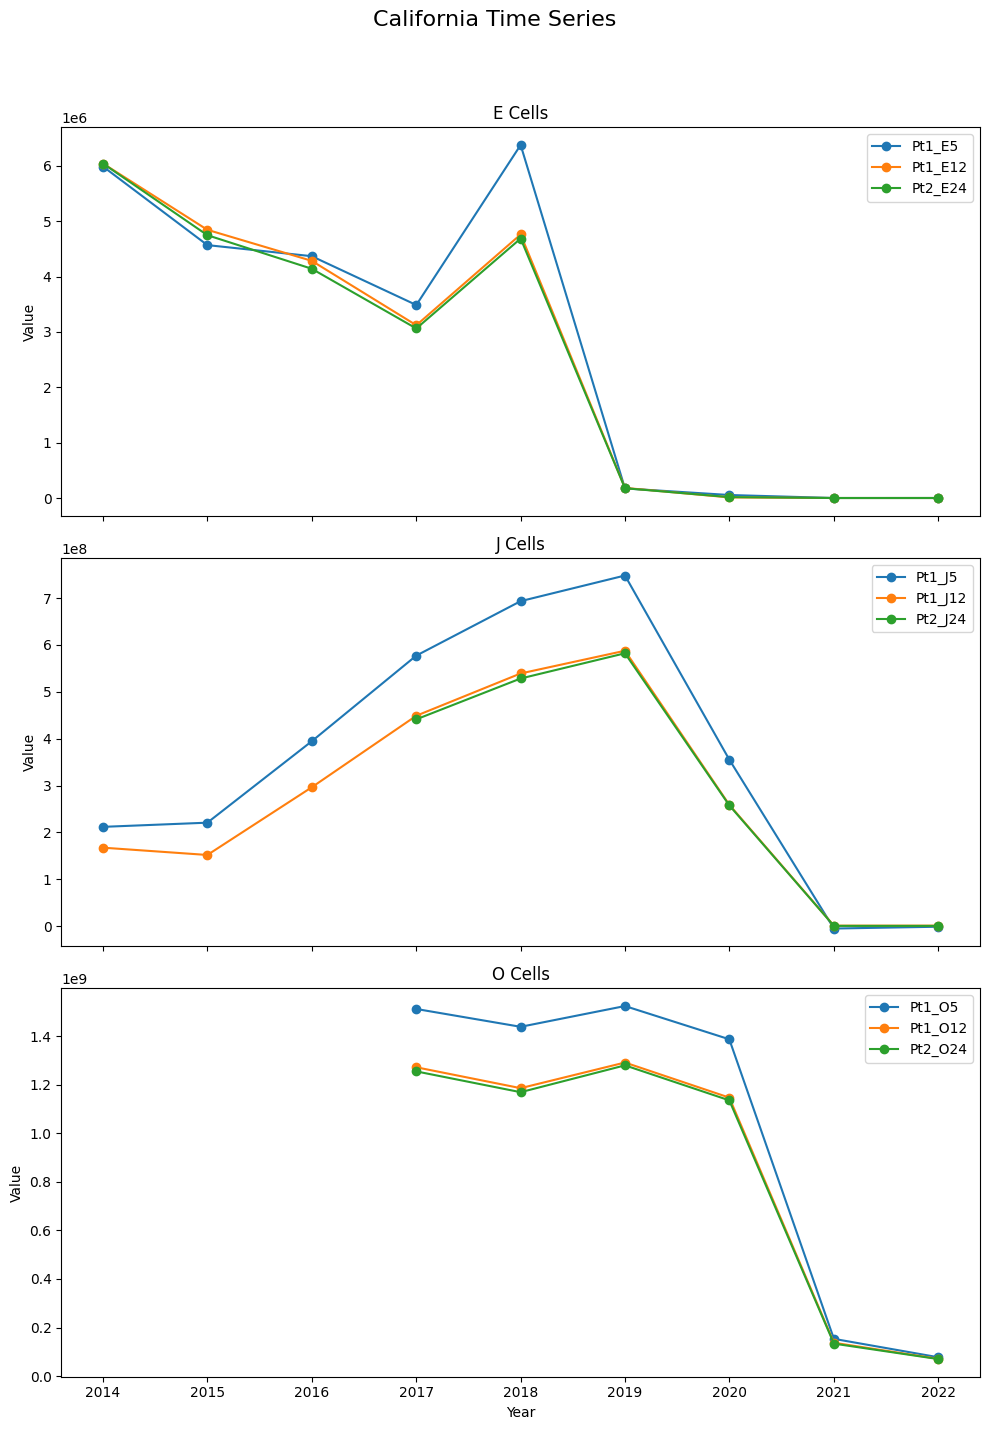

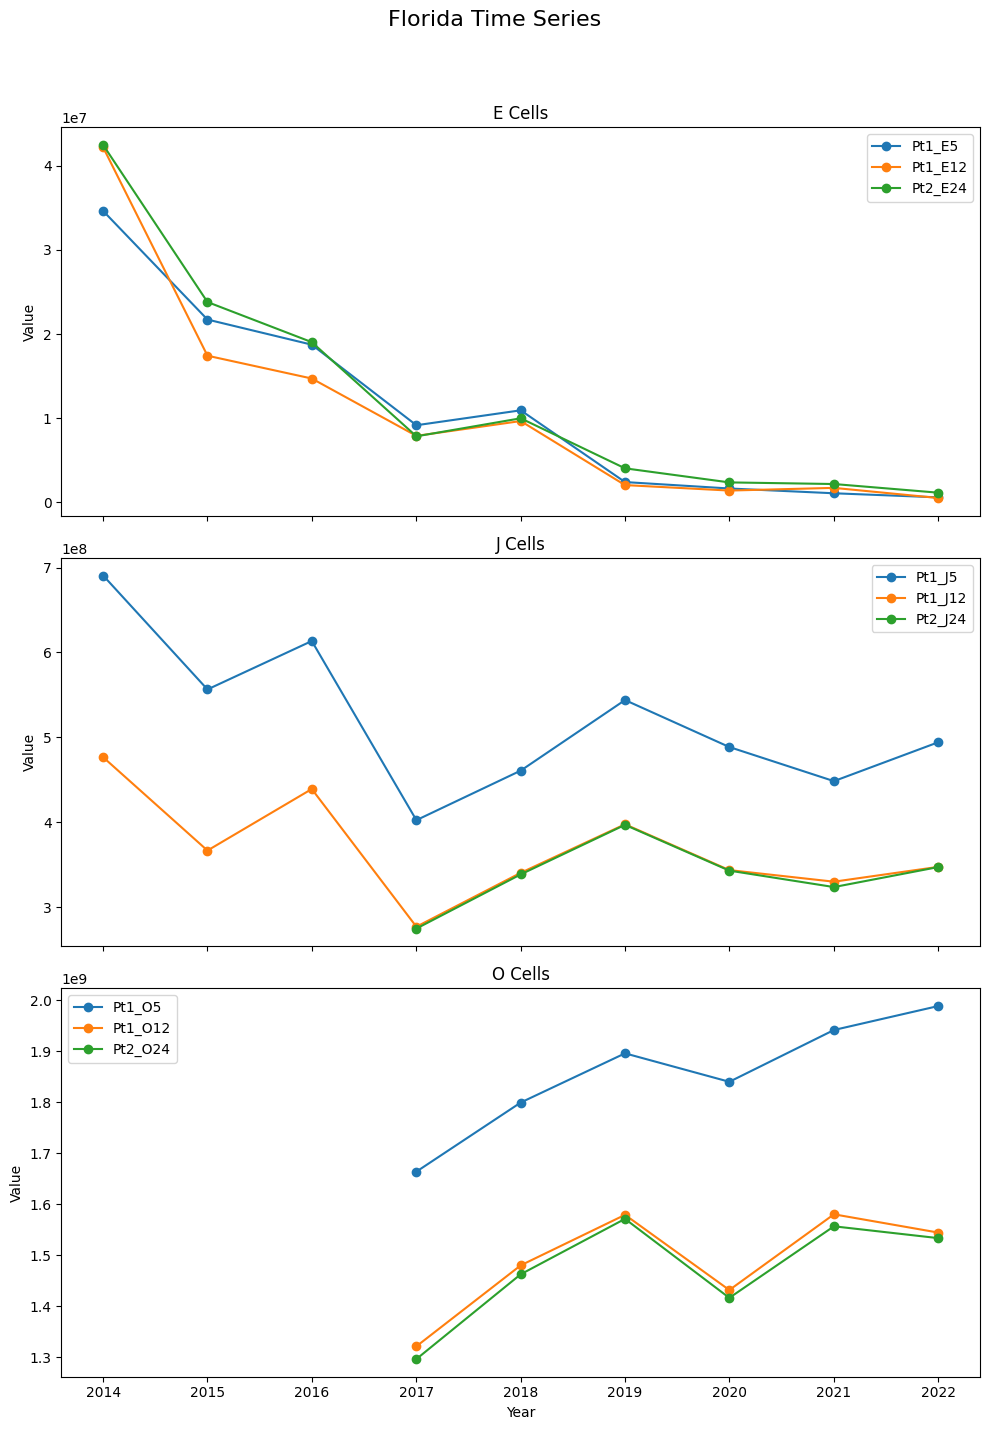

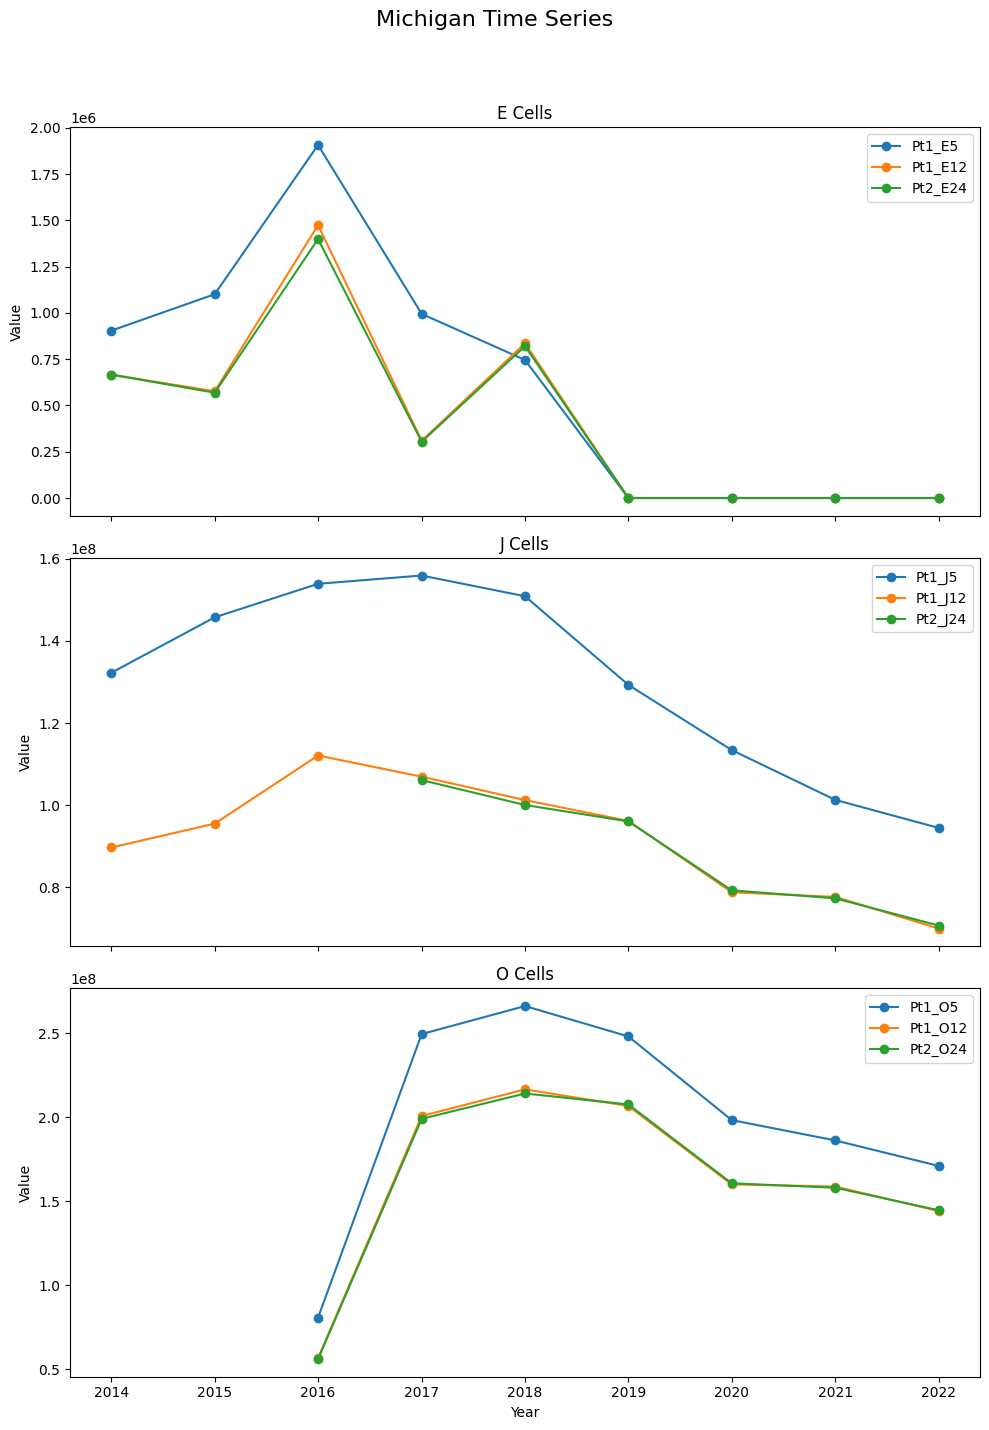

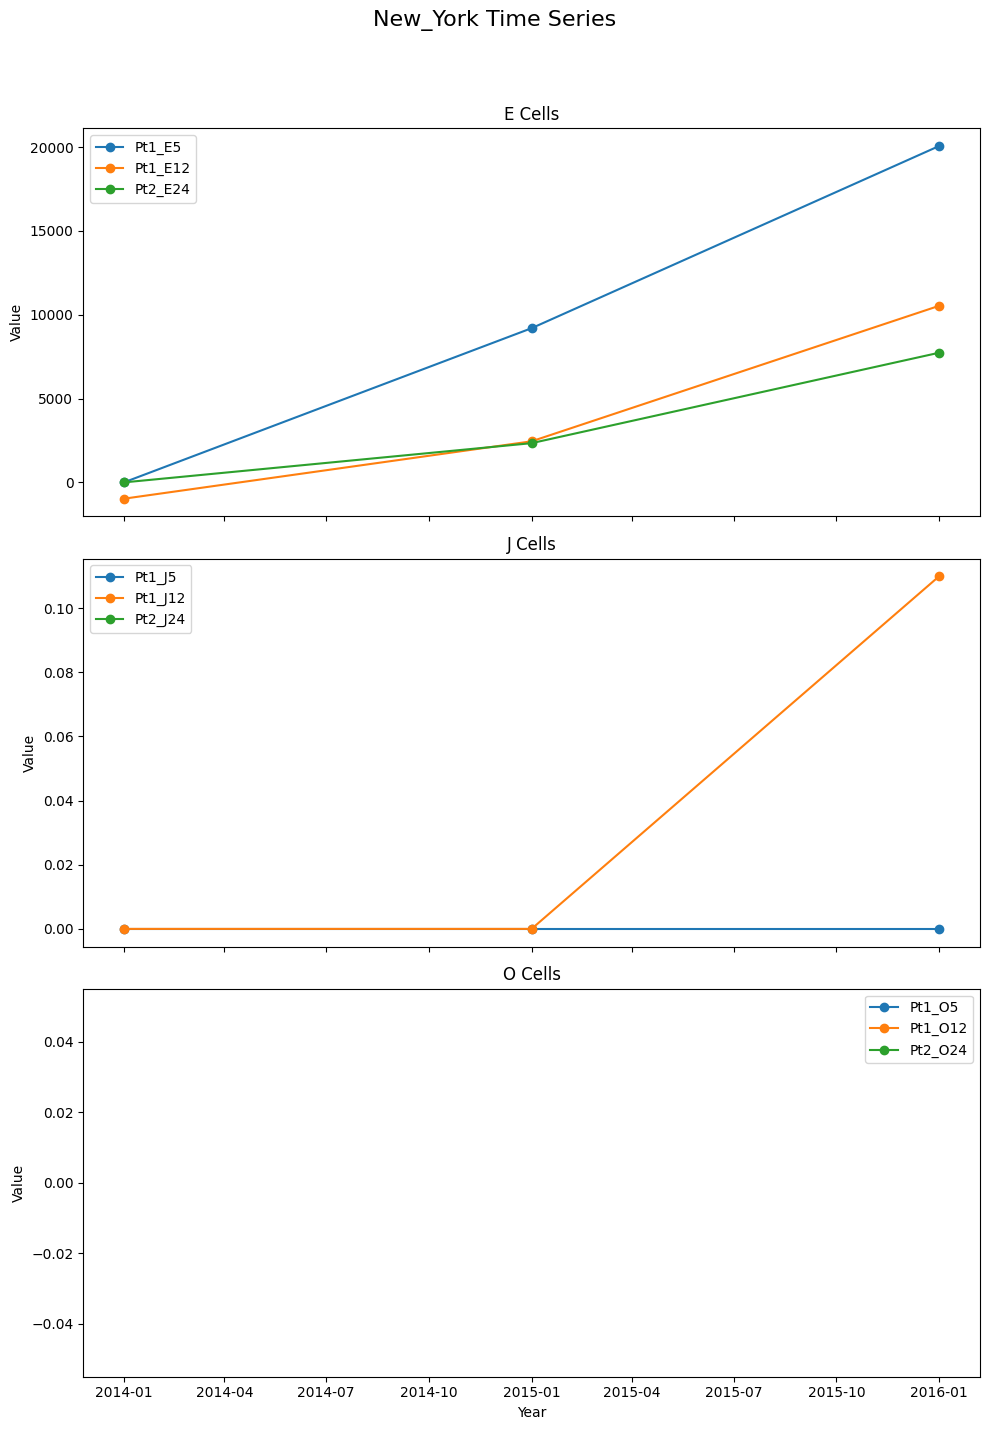

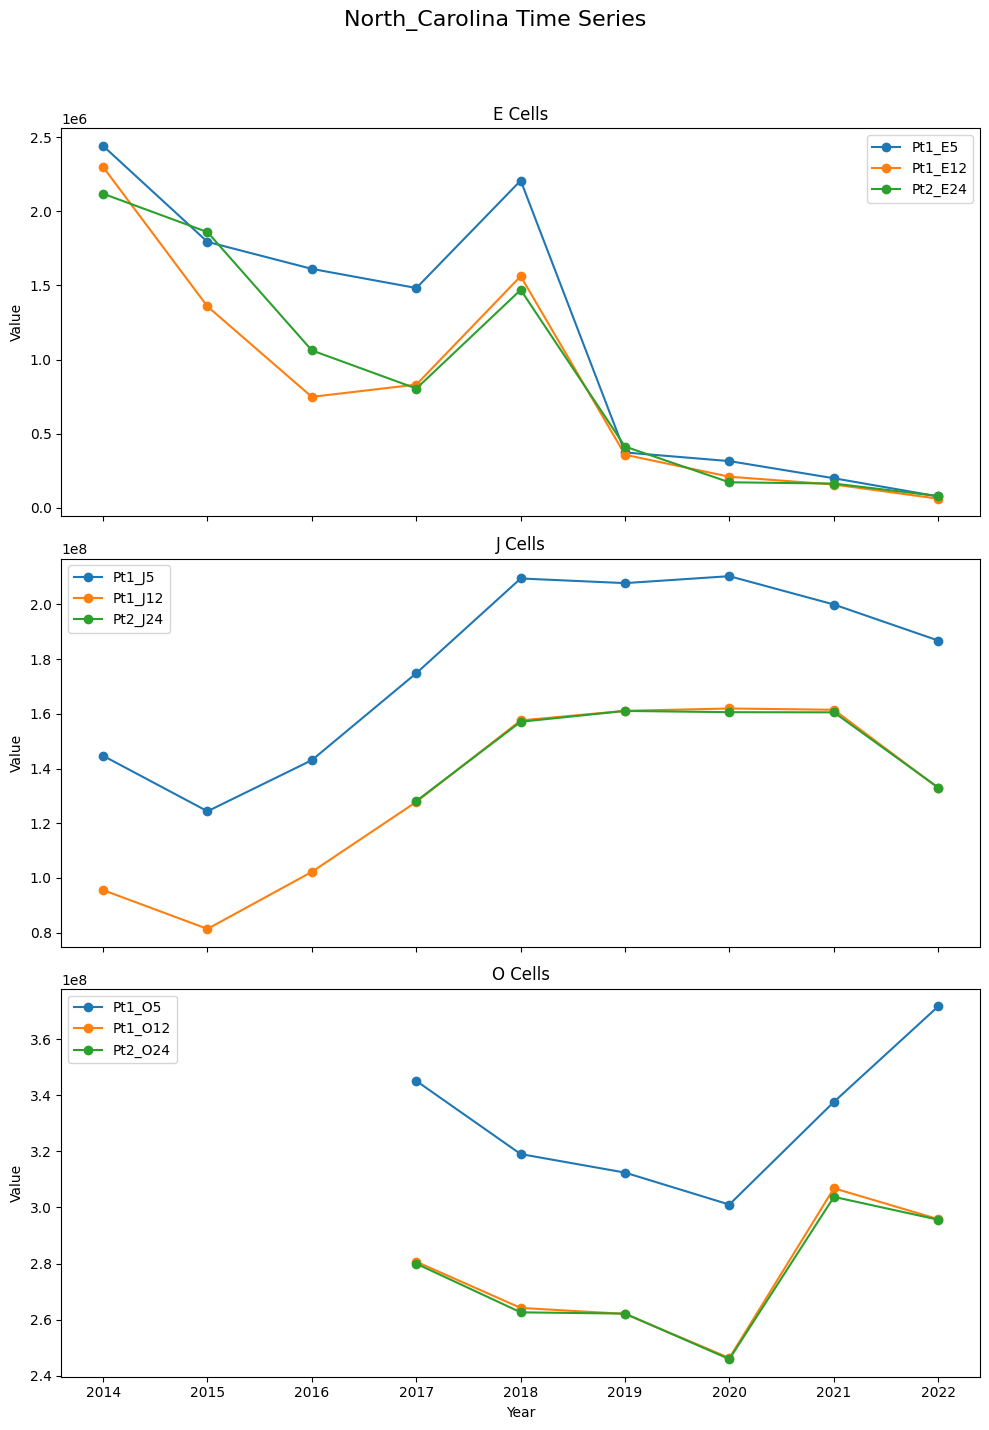

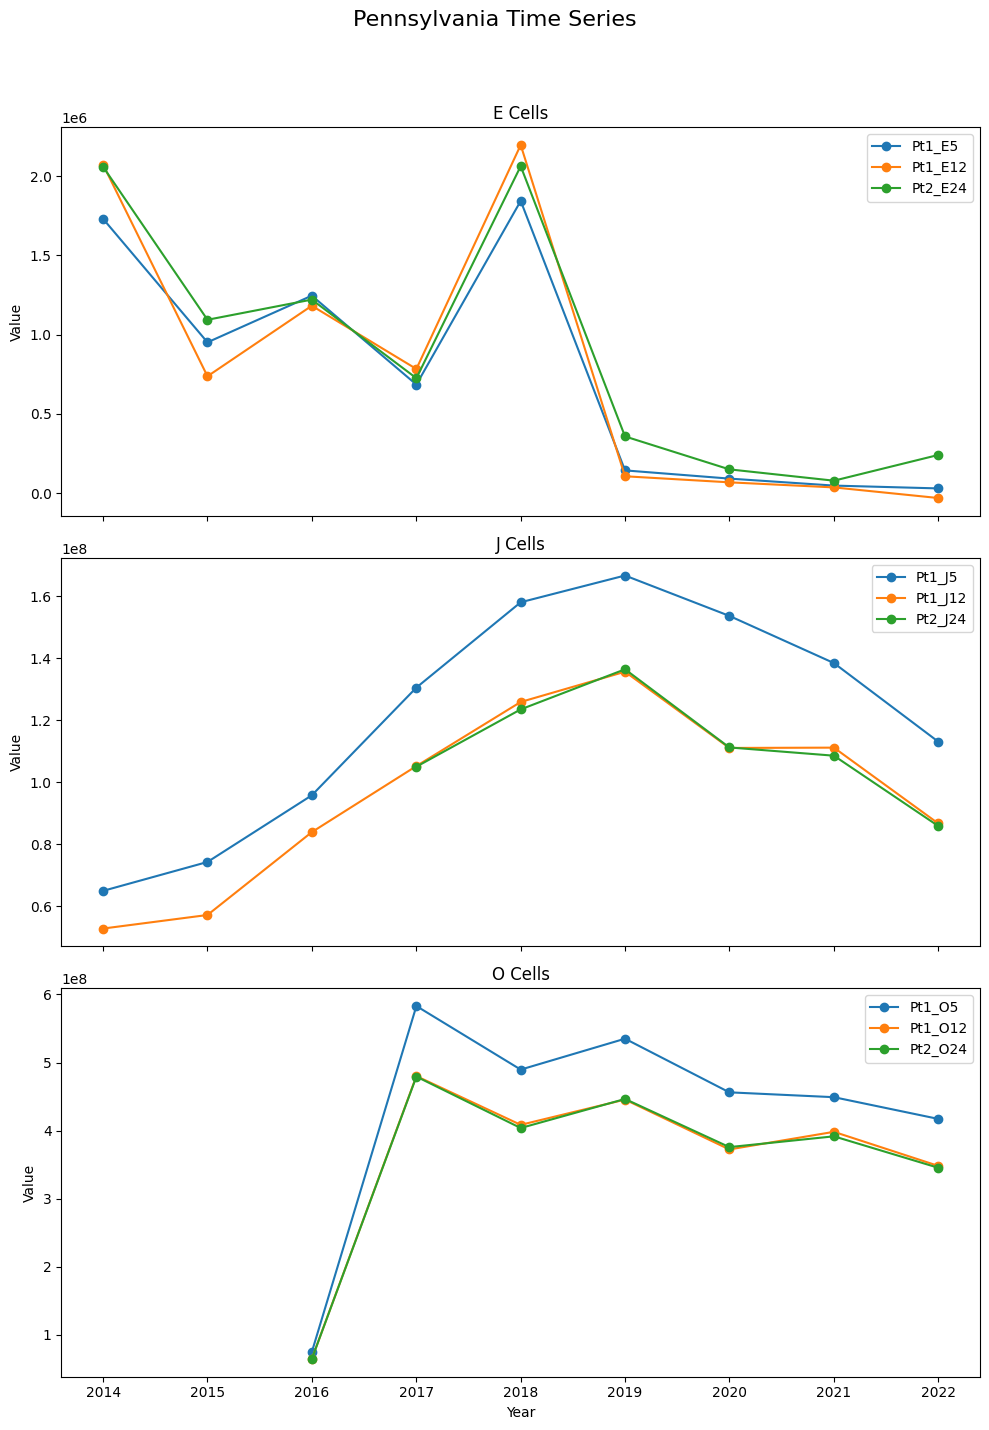

In [19]:
import matplotlib.pyplot as plt

# Define the column groups for the plots
E_cols = ['Pt1_E5', 'Pt1_E12', 'Pt2_E24']
J_cols = ['Pt1_J5', 'Pt1_J12', 'Pt2_J24']
O_cols = ['Pt1_O5', 'Pt1_O12', 'Pt2_O24']

# Get the unique states from the DataFrame
states = df['state'].unique()

# Loop over each state and create a figure with three subplots for E, J, and O cells
for state in states:
    # Subset the DataFrame for the current state
    state_df = df[df['state'] == state]
    
    # Create a figure with 3 subplots (one for each group of cells)
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)
    fig.suptitle(f"{state} Time Series", fontsize=16)
    
    # Plot the E cells
    for col in E_cols:
        if col in state_df.columns:
            axes[0].plot(state_df.index, state_df[col], marker='o', label=col)
    axes[0].set_title("E Cells")
    axes[0].legend()
    axes[0].set_ylabel("Value")
    
    # Plot the J cells
    for col in J_cols:
        if col in state_df.columns:
            axes[1].plot(state_df.index, state_df[col], marker='o', label=col)
    axes[1].set_title("J Cells")
    axes[1].legend()
    axes[1].set_ylabel("Value")
    
    # Plot the O cells
    for col in O_cols:
        if col in state_df.columns:
            axes[2].plot(state_df.index, state_df[col], marker='o', label=col)
    axes[2].set_title("O Cells")
    axes[2].legend()
    axes[2].set_ylabel("Value")
    axes[2].set_xlabel("Year")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


                     state  year   claims_paid  claims_incurred  \
date                                                              
2014-01-01      California  2014  1.807467e+07              NaN   
2015-01-01      California  2015  1.416372e+07              NaN   
2016-01-01      California  2016  1.279736e+07              NaN   
2017-01-01      California  2017  9.671769e+06     1.467276e+09   
2018-01-01      California  2018  1.582805e+07     1.760715e+09   
2019-01-01      California  2019  5.323310e+05     1.917652e+09   
2020-01-01      California  2020  8.191923e+04     8.719957e+08   
2021-01-01      California  2021  0.000000e+00    -3.401604e+06   
2022-01-01      California  2022  3.262300e+02     4.810876e+05   
2014-01-01         Florida  2014  1.192904e+08              NaN   
2015-01-01         Florida  2015  6.297771e+07              NaN   
2016-01-01         Florida  2016  5.251544e+07              NaN   
2017-01-01         Florida  2017  2.494497e+07     9.540980e+0

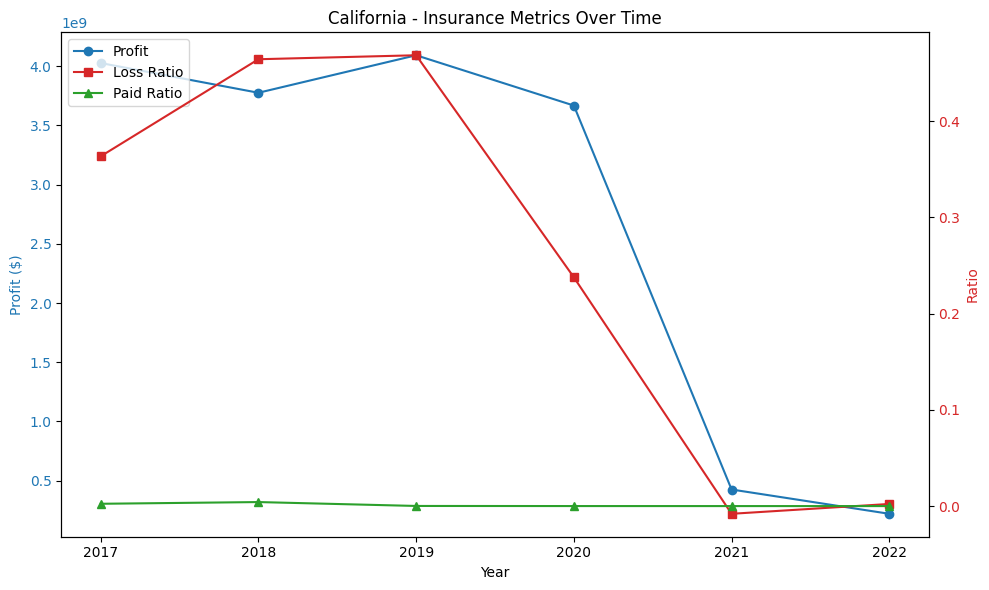

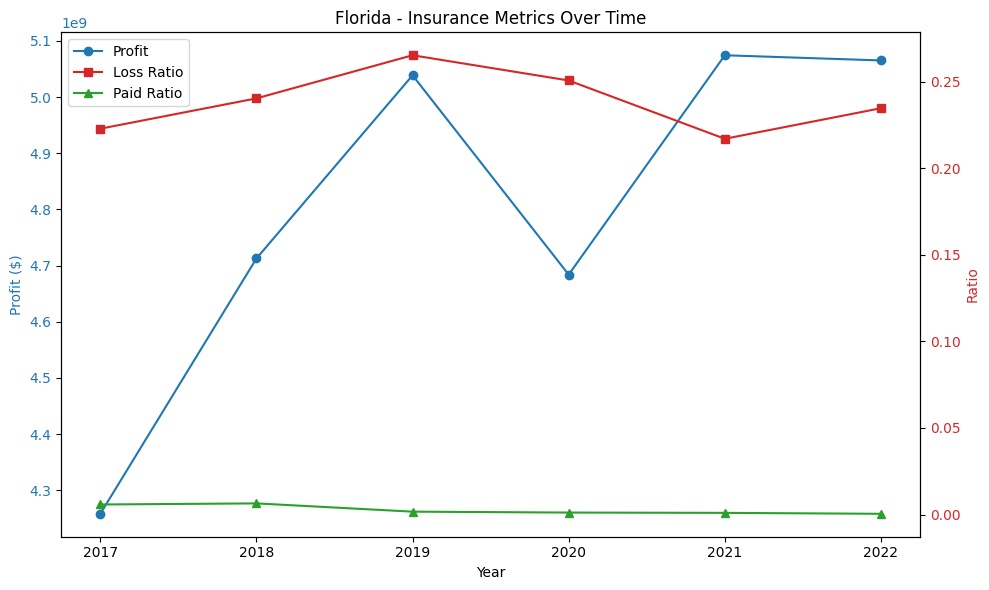

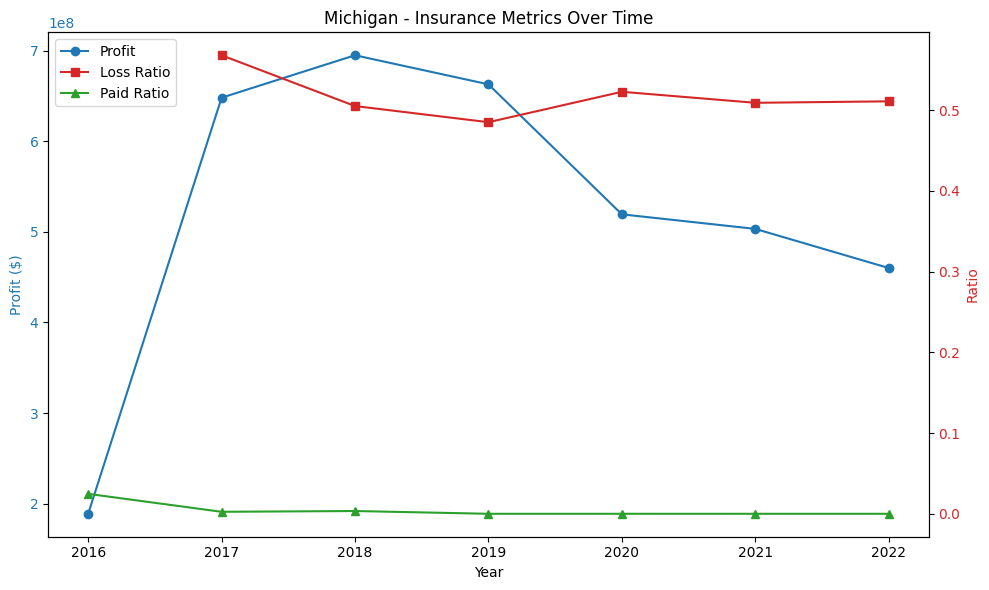

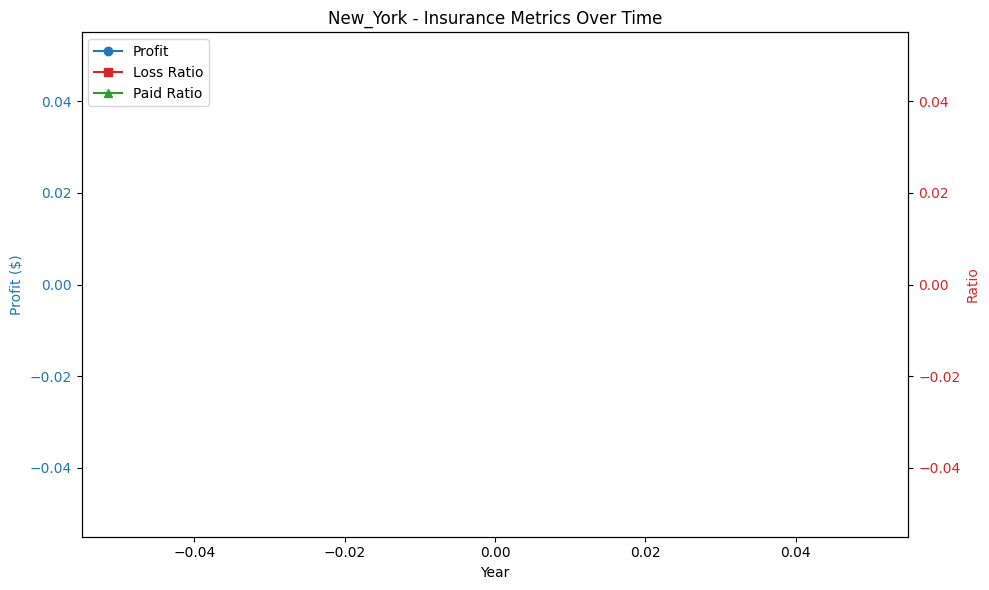

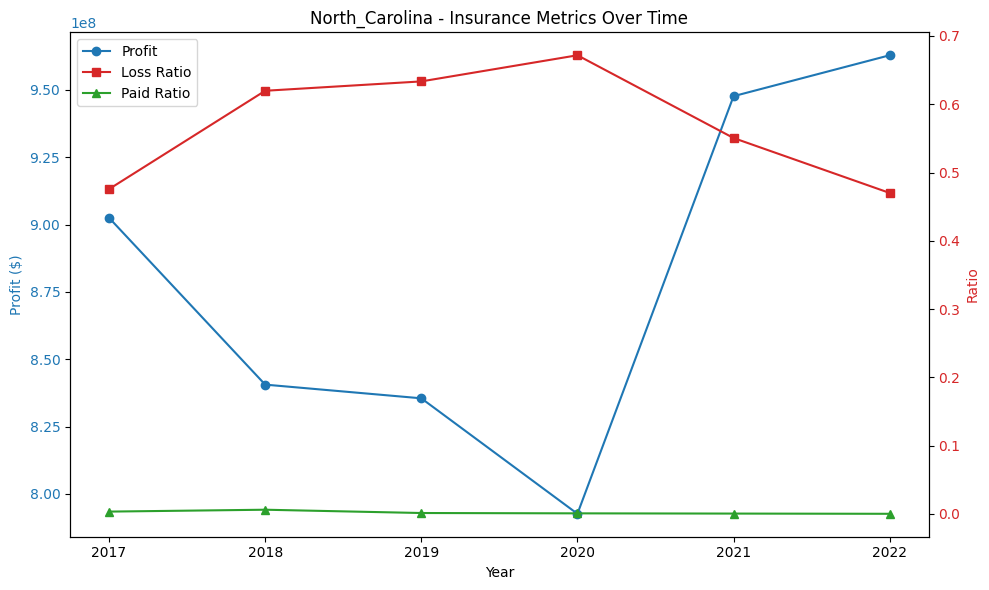

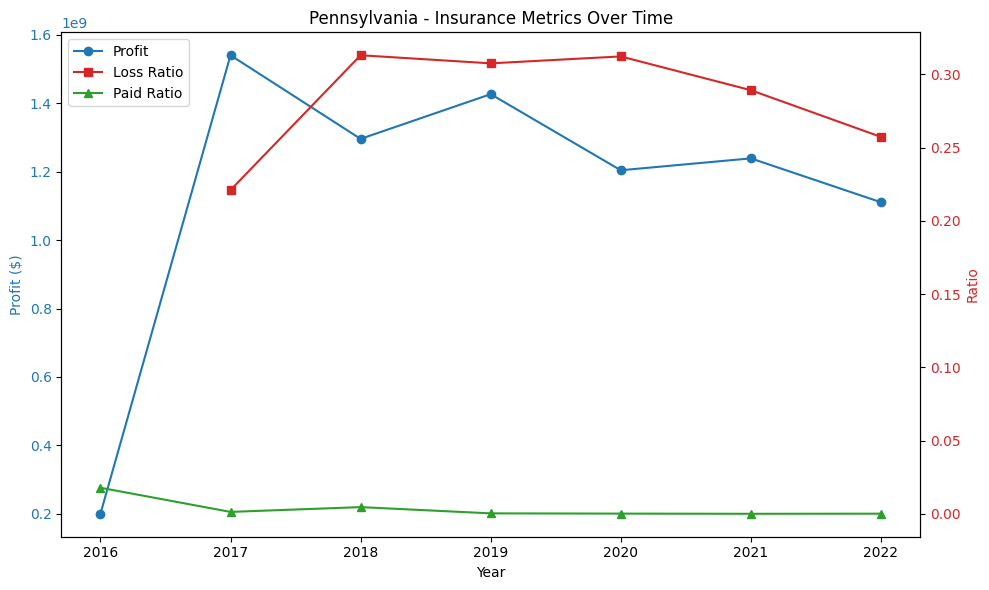

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Assuming you have a DataFrame 'df' with these columns:
# 'Pt1_E5', 'Pt1_E12', 'Pt2_E24'  --> for claims paid (E values)
# 'Pt1_J5', 'Pt1_J12', 'Pt2_J24'  --> for claims incurred (J values)
# 'Pt1_O5', 'Pt1_O12', 'Pt2_O24'  --> for premium earned (O values)
# 'state' and 'year' columns (year is numeric or datetime)

# First, compute the aggregated values for each metric:
df['claims_paid']    = df['Pt1_E5'] + df['Pt1_E12'] + df['Pt2_E24']
df['claims_incurred'] = df['Pt1_J5'] + df['Pt1_J12'] + df['Pt2_J24']
df['premium_earned']  = df['Pt1_O5'] + df['Pt1_O12'] + df['Pt2_O24']

# Compute derived metrics:
df['profit']     = df['premium_earned'] - df['claims_paid']
df['loss_ratio'] = df['claims_incurred'] / df['premium_earned']
df['paid_ratio'] = df['claims_paid'] / df['premium_earned']

# Display the resulting DataFrame (optional)
print(df[['state', 'year', 'claims_paid', 'claims_incurred', 'premium_earned',
          'profit', 'loss_ratio', 'paid_ratio']])

# Now, for each individual state, we can graph these metrics over time.
states = df['state'].unique()
for state in states:
    # Subset and sort data for this state by year
    state_df = df[df['state'] == state].sort_values('year')
    
    # Create a figure with two y-axes so we can display the profit (in absolute dollars)
    # and the ratios (dimensionless) in the same plot.
    fig, ax1 = plt.subplots(figsize=(10,6))
    
    # Plot profit (Premium Earned - Claims Paid) on the primary y-axis.
    ax1.plot(state_df['year'], state_df['profit'], marker='o', color='tab:blue', label='Profit')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Profit ($)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Create a second y-axis for the ratios.
    ax2 = ax1.twinx()
    ax2.plot(state_df['year'], state_df['loss_ratio'], marker='s', color='tab:red', label='Loss Ratio')
    ax2.plot(state_df['year'], state_df['paid_ratio'], marker='^', color='tab:green', label='Paid Ratio')
    ax2.set_ylabel('Ratio', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    # Combine legends from both axes.
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.title(f"{state} - Insurance Metrics Over Time")
    plt.tight_layout()
    plt.show()


In [23]:
import pandas as pd
import numpy as np

# For demonstration, assume df already exists and has the following columns:
# 'state', 'year', 'Pt1_E5', 'Pt1_E12', 'Pt2_E24',
# 'Pt1_J5', 'Pt1_J12', 'Pt2_J24',
# 'Pt1_O5', 'Pt1_O12', 'Pt2_O24'

# Compute metrics for group E
df['E_net_income'] = df['Pt1_E5'] - df['Pt2_E24']  # Premium Earned - Claims Paid
df['E_loss_ratio'] = np.where(df['Pt1_E5'] != 0, df['Pt1_E12'] / df['Pt1_E5'], np.nan)
df['E_profit_margin'] = np.where(df['Pt1_E5'] != 0, (df['Pt1_E5'] - df['Pt2_E24']) / df['Pt1_E5'], np.nan)

# Compute metrics for group J
df['J_net_income'] = df['Pt1_J5'] - df['Pt2_J24']
df['J_loss_ratio'] = np.where(df['Pt1_J5'] != 0, df['Pt1_J12'] / df['Pt1_J5'], np.nan)
df['J_profit_margin'] = np.where(df['Pt1_J5'] != 0, (df['Pt1_J5'] - df['Pt2_J24']) / df['Pt1_J5'], np.nan)

# Compute metrics for group O
df['O_net_income'] = df['Pt1_O5'] - df['Pt2_O24']
df['O_loss_ratio'] = np.where(df['Pt1_O5'] != 0, df['Pt1_O12'] / df['Pt1_O5'], np.nan)
df['O_profit_margin'] = np.where(df['Pt1_O5'] != 0, (df['Pt1_O5'] - df['Pt2_O24']) / df['Pt1_O5'], np.nan)

# For example, you can now print or examine the new metrics:
print(df[['state', 'year', 'E_net_income', 'E_loss_ratio', 'E_profit_margin',
          'J_net_income', 'J_loss_ratio', 'J_profit_margin',
          'O_net_income', 'O_loss_ratio', 'O_profit_margin']])


                     state  year  E_net_income  E_loss_ratio  E_profit_margin  \
date                                                                            
2014-01-01      California  2014     -53882.71      1.008966        -0.008997   
2015-01-01      California  2015    -179192.92      1.060514        -0.039216   
2016-01-01      California  2016     226859.92      0.980813         0.051921   
2017-01-01      California  2017     423925.96      0.895256         0.121574   
2018-01-01      California  2018    1690332.86      0.746512         0.265009   
2019-01-01      California  2019      -4016.60      1.053779        -0.023217   
2020-01-01      California  2020      38099.99      0.207570         0.700791   
2021-01-01      California  2021          0.00           NaN              NaN   
2022-01-01      California  2022       -401.67           NaN              NaN   
2014-01-01         Florida  2014   -7838482.37      1.218101        -0.226331   
2015-01-01         Florida  

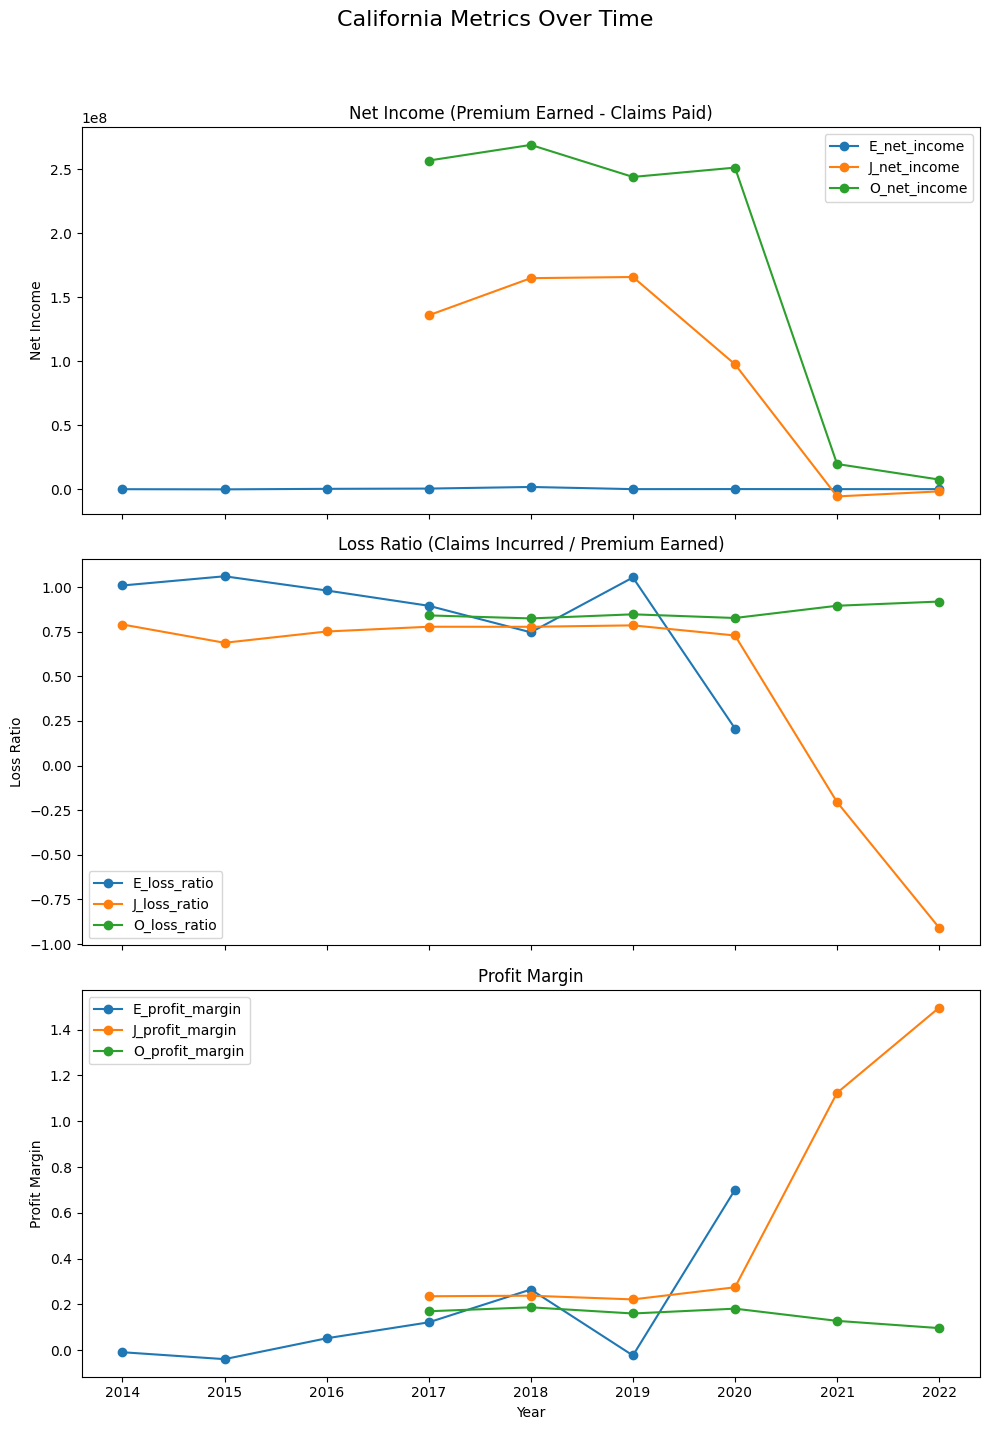

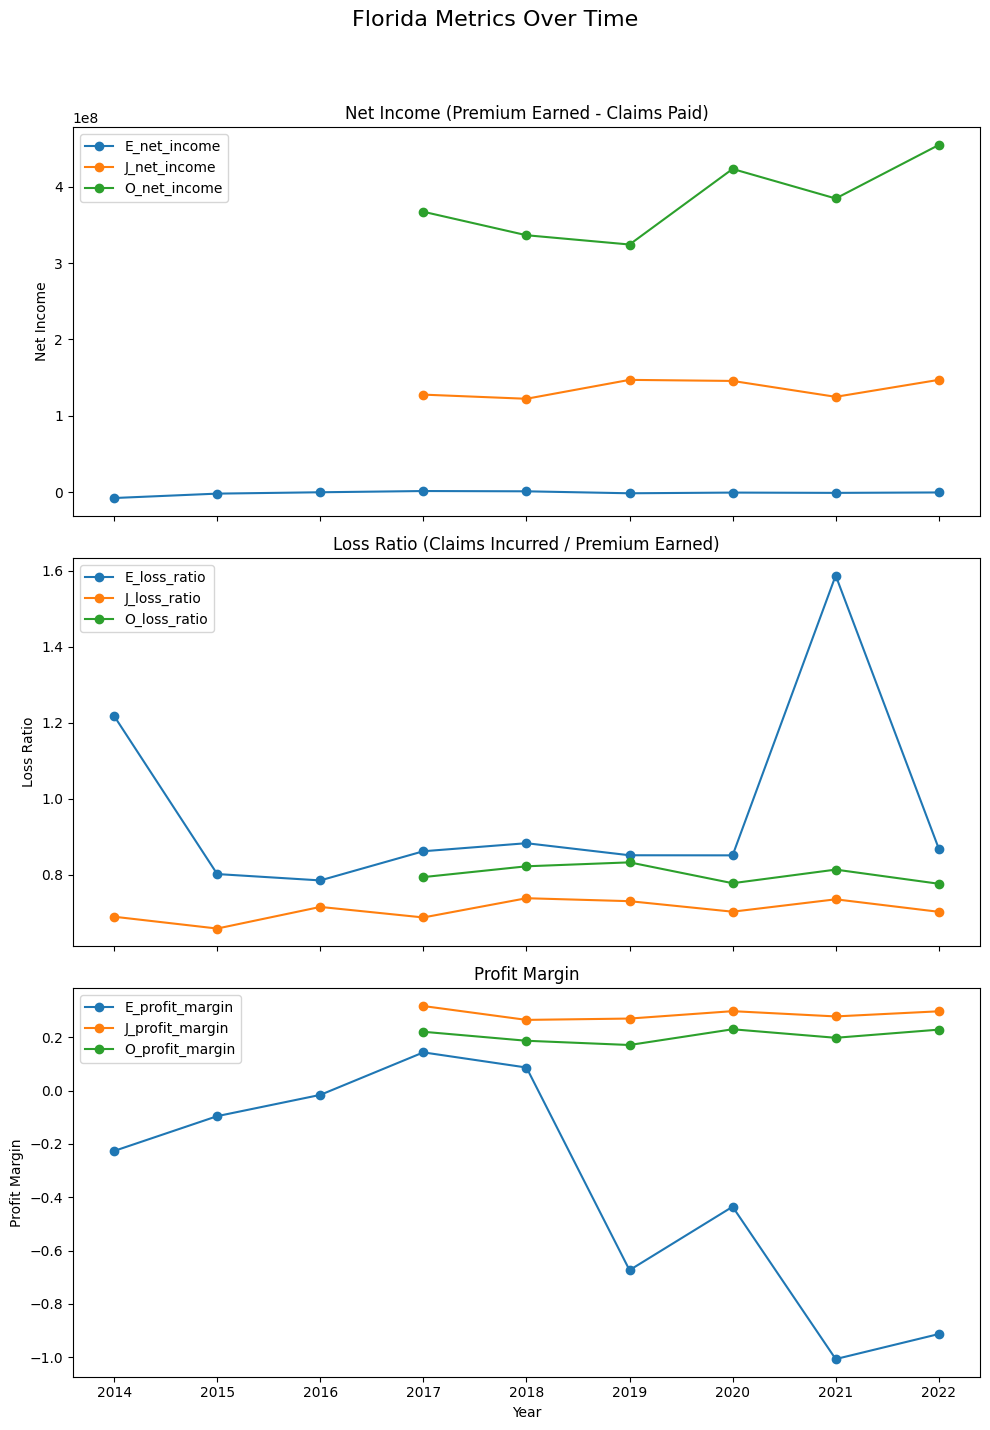

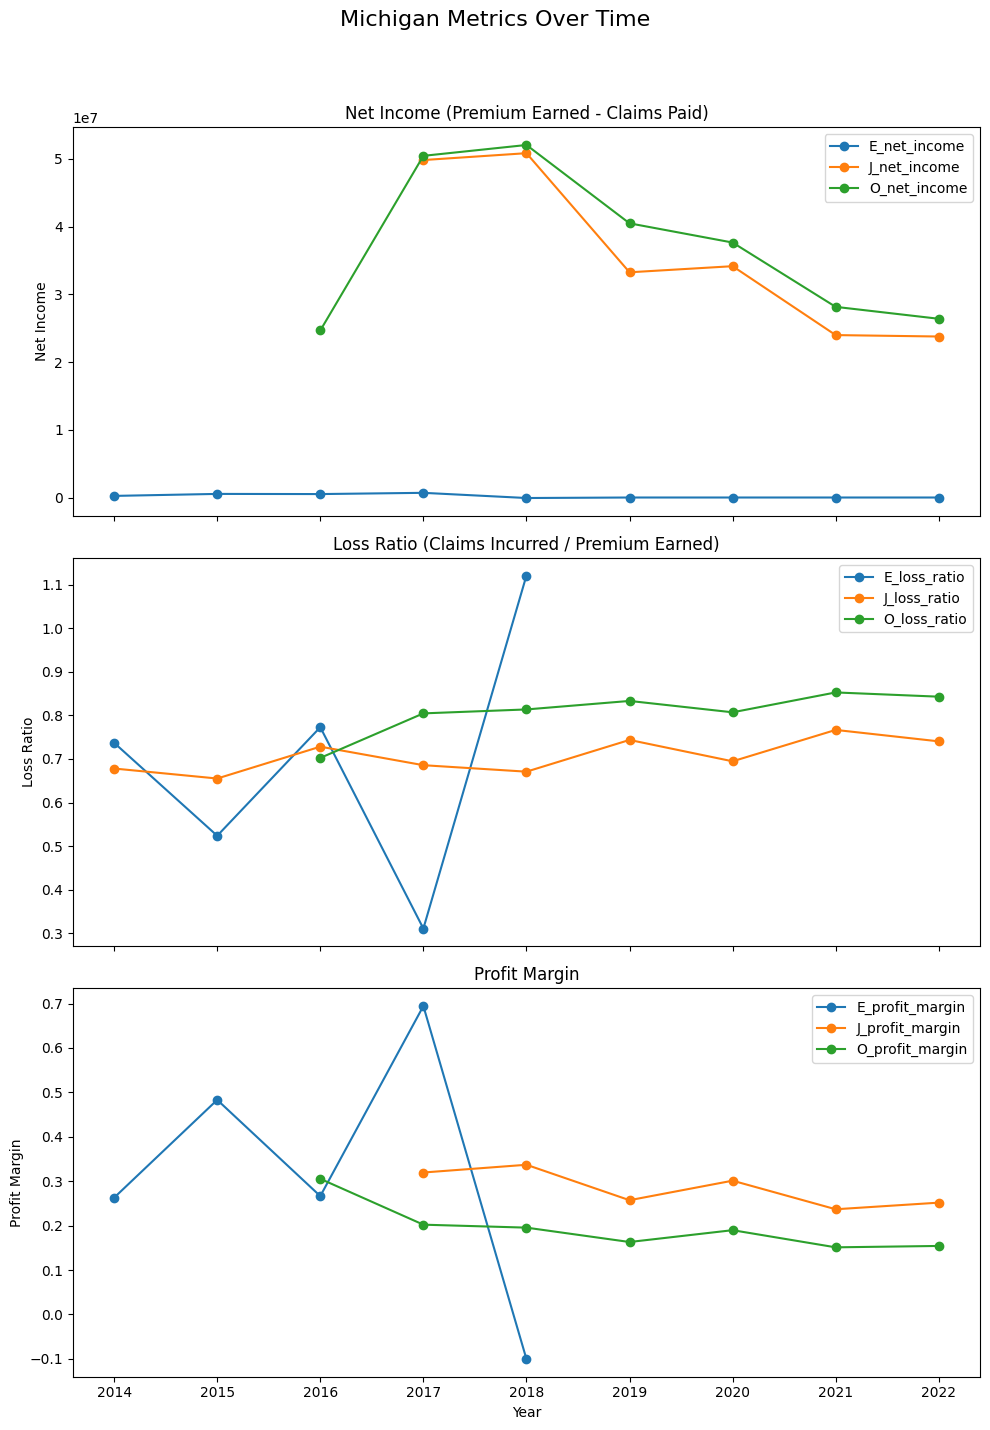

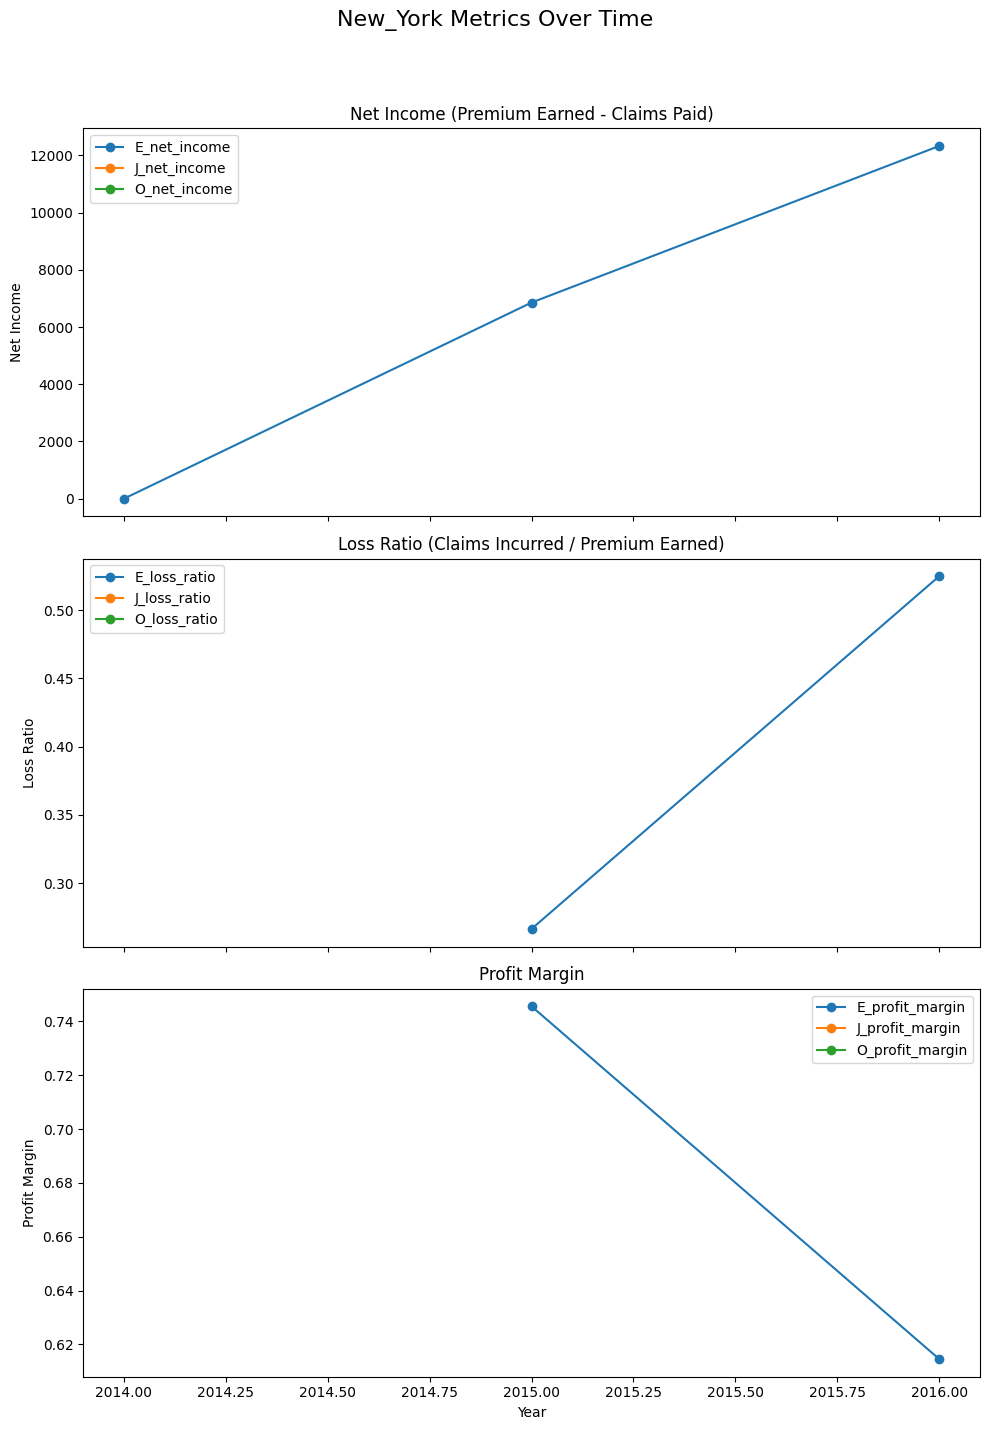

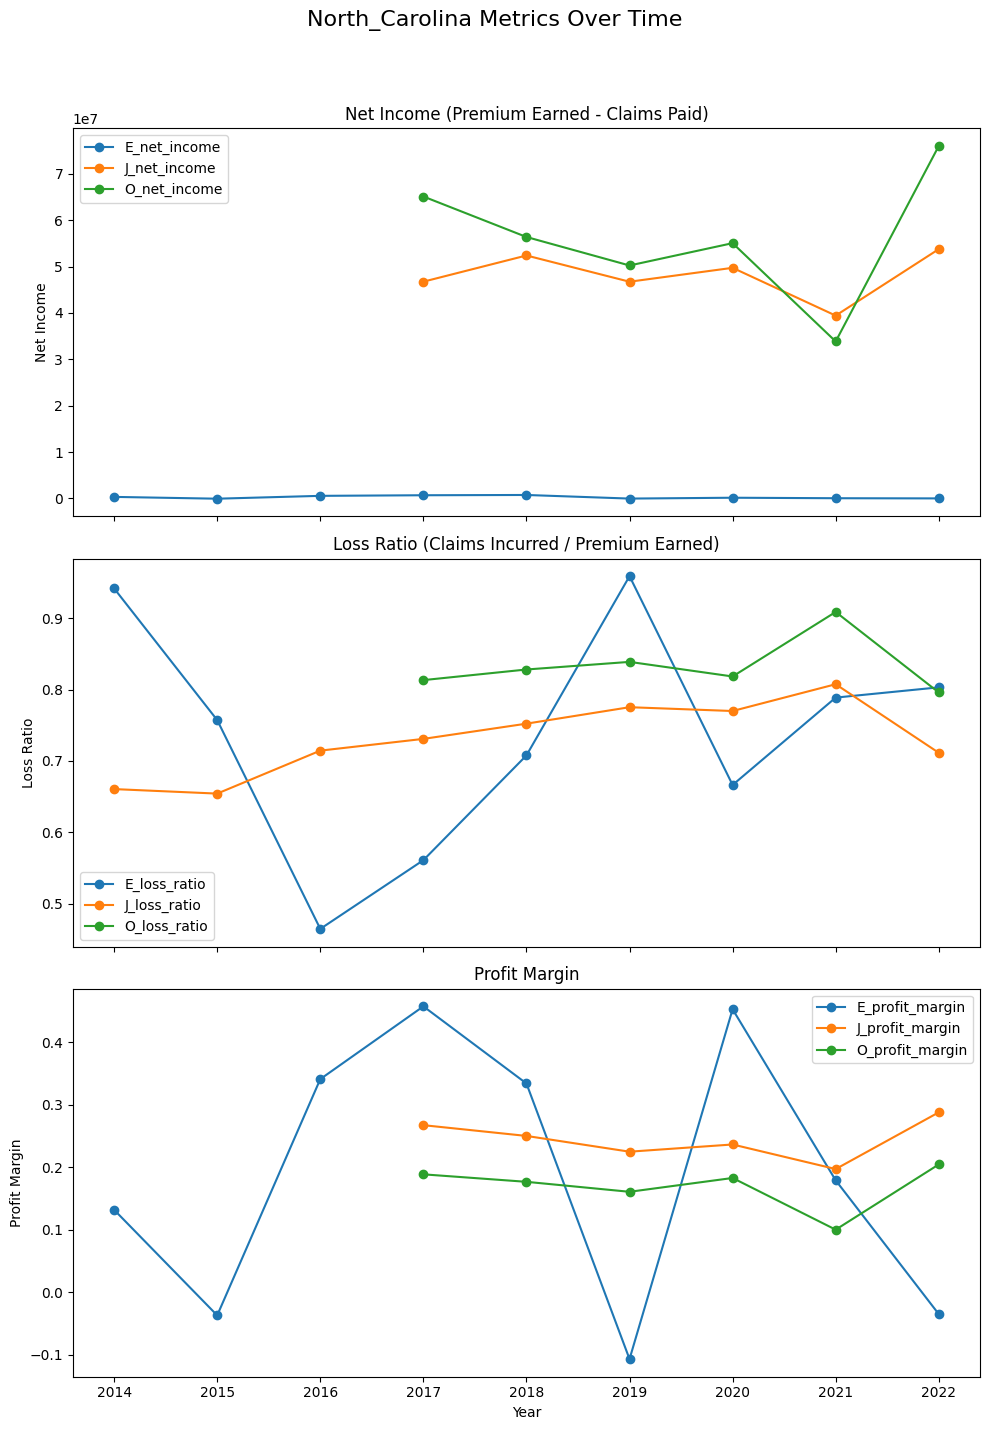

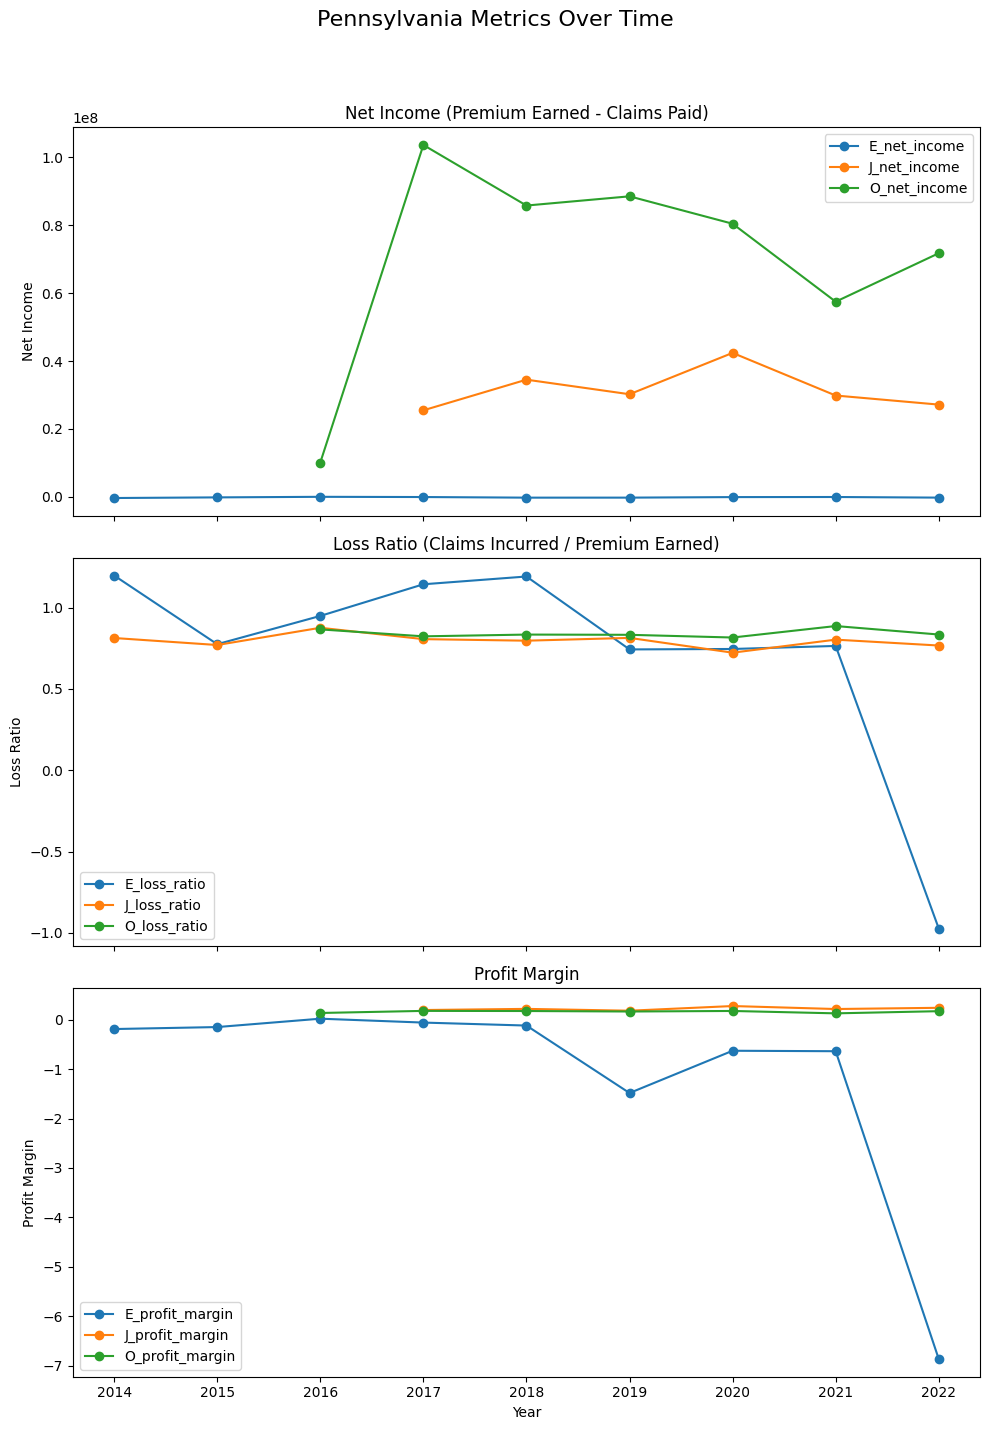

In [24]:
import matplotlib.pyplot as plt

# Ensure the 'year' column is numeric (or use df.index if it's a datetime)
df['year'] = df['year'].astype(int)

# Get the unique states
states = df['state'].unique()

for state in states:
    # Subset and sort the DataFrame for the current state by year
    state_df = df[df['state'] == state].sort_values(by='year')
    
    # Create a figure with three subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
    fig.suptitle(f"{state} Metrics Over Time", fontsize=16)
    
    # Plot Net Income (Premium Earned - Claims Paid)
    axs[0].plot(state_df['year'], state_df['E_net_income'], marker='o', label='E_net_income')
    axs[0].plot(state_df['year'], state_df['J_net_income'], marker='o', label='J_net_income')
    axs[0].plot(state_df['year'], state_df['O_net_income'], marker='o', label='O_net_income')
    axs[0].set_title("Net Income (Premium Earned - Claims Paid)")
    axs[0].set_ylabel("Net Income")
    axs[0].legend()
    
    # Plot Loss Ratio (Claims Incurred / Premium Earned)
    axs[1].plot(state_df['year'], state_df['E_loss_ratio'], marker='o', label='E_loss_ratio')
    axs[1].plot(state_df['year'], state_df['J_loss_ratio'], marker='o', label='J_loss_ratio')
    axs[1].plot(state_df['year'], state_df['O_loss_ratio'], marker='o', label='O_loss_ratio')
    axs[1].set_title("Loss Ratio (Claims Incurred / Premium Earned)")
    axs[1].set_ylabel("Loss Ratio")
    axs[1].legend()
    
    # Plot Profit Margin ((Premium Earned - Claims Paid) / Premium Earned)
    axs[2].plot(state_df['year'], state_df['E_profit_margin'], marker='o', label='E_profit_margin')
    axs[2].plot(state_df['year'], state_df['J_profit_margin'], marker='o', label='J_profit_margin')
    axs[2].plot(state_df['year'], state_df['O_profit_margin'], marker='o', label='O_profit_margin')
    axs[2].set_title("Profit Margin")
    axs[2].set_ylabel("Profit Margin")
    axs[2].set_xlabel("Year")
    axs[2].legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


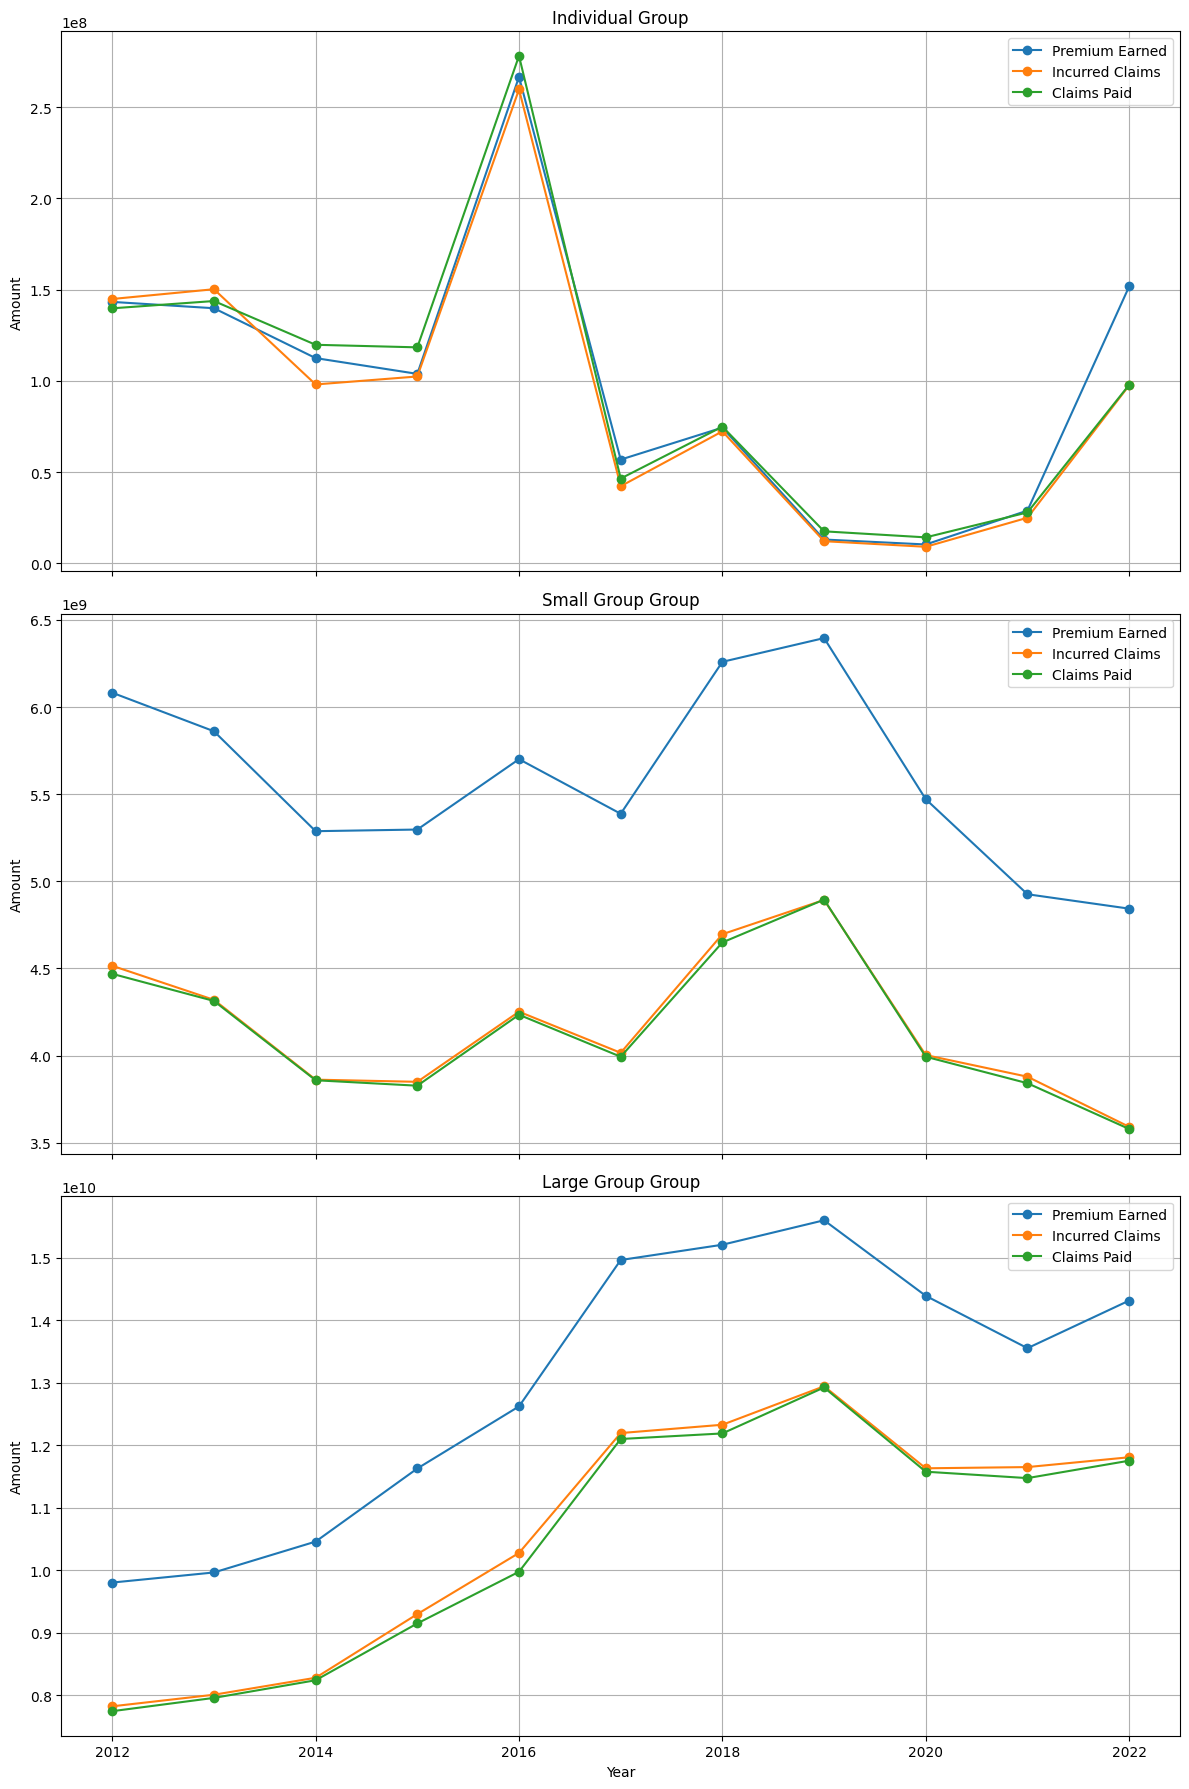

In [3]:
import matplotlib.pyplot as plt

# Define the years (x-axis)
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Data for each group, in the order: [Premium Earned, Incurred Claims, Claims Paid]
data = {
    'Individual': {
        'Premium Earned': [143251892, 139782253, 112441184, 103796853, 266625681, 56806717, 74322369, 12981886, 10272828, 28842401, 151703531],
        'Incurred Claims': [144846261, 150206096, 97997025, 102359957, 259727958, 42215529, 72298056, 12069955, 9001228, 24929115, 97487747],
        'Claims Paid': [139732145, 143730058, 119740817, 118338256, 278123835, 46417919, 74864232, 17475745, 14163746, 27844267, 97790562]
    },
    'Small Group': {
        'Premium Earned': [6082224019, 5860978118, 5287500974, 5296932655, 5700839661, 5387493996, 6259479549, 6395802551, 5471041542, 4925633726, 4842941491],
        'Incurred Claims': [4515060978, 4319630174, 3861564406, 3849110285, 4251528788, 4015590325, 4696226599, 4892911813, 4002486322, 3878476941, 3590868447],
        'Claims Paid': [4468802513, 4313216040, 3858068567, 3826864901, 4234046866, 3993122190, 4649063816, 4894893343, 3993113846, 3841068567, 3578443848]
    },
    'Large Group': {
        'Premium Earned': [9803789059, 9965421545, 10459516414, 11629477472, 12623283812, 14966187521, 15210795554, 15602391760, 14392762316, 13555077898, 14317209653],
        'Incurred Claims': [7823121702, 8008346737, 8280086476, 9298770681, 10277503894, 12196576183, 12329492149, 12945497842, 11632543196, 11652006331, 11809203416],
        'Claims Paid': [7745193748, 7957911948, 8240261318, 9149878374, 9976516521, 12101594034, 12190502583, 12926122468, 11578089836, 11475600268, 11754281414]
    }
}

# Create a figure with three subplots (one per group)
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Loop over the groups and plot the three metrics on each subplot
for i, group in enumerate(['Individual', 'Small Group', 'Large Group']):
    ax = axs[i]
    ax.plot(years, data[group]['Premium Earned'], marker='o', label='Premium Earned')
    ax.plot(years, data[group]['Incurred Claims'], marker='o', label='Incurred Claims')
    ax.plot(years, data[group]['Claims Paid'], marker='o', label='Claims Paid')
    ax.set_title(f'{group} Group')
    ax.set_ylabel('Amount')
    ax.legend()
    ax.grid(True)

axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()


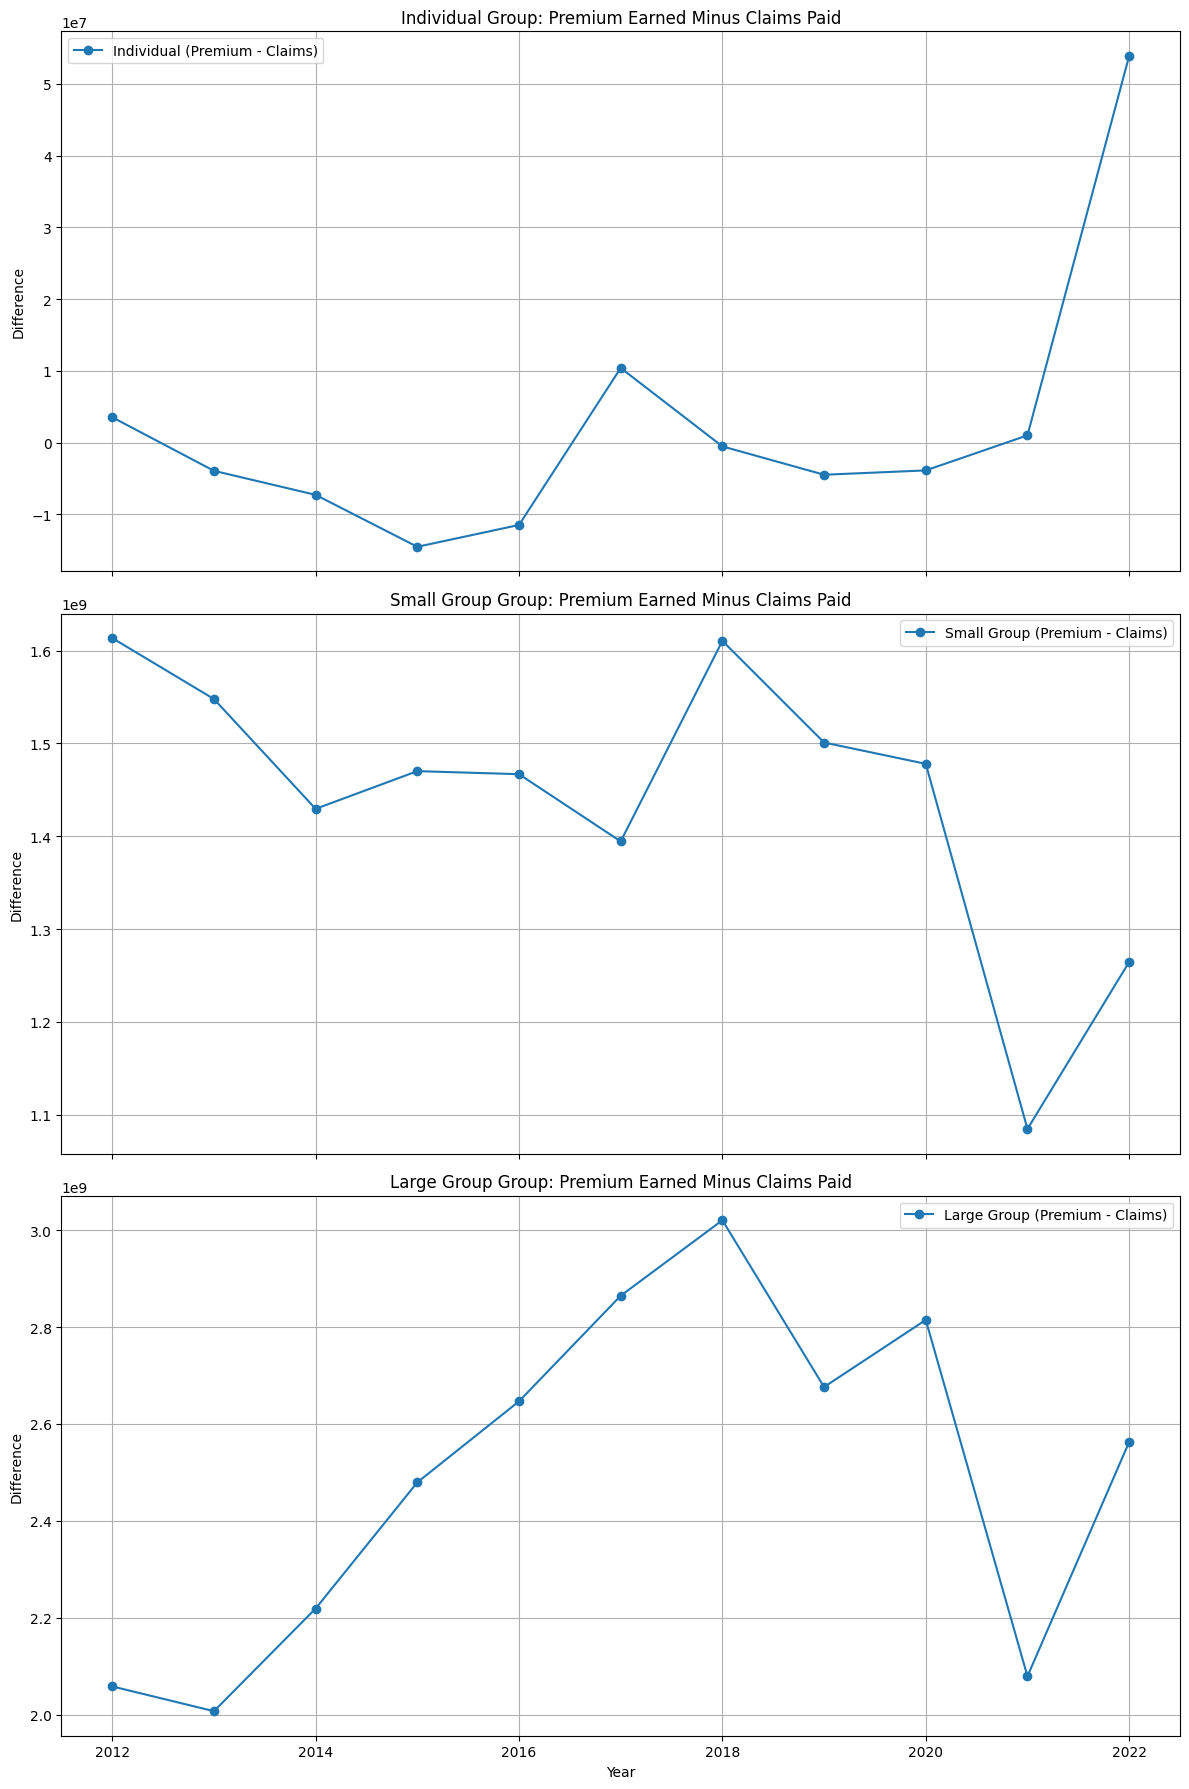

In [4]:
import matplotlib.pyplot as plt

# Define the years (x-axis)
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Data for each group
data = {
    'Individual': {
        'Premium Earned': [143251892, 139782253, 112441184, 103796853, 266625681, 56806717, 74322369, 12981886, 10272828, 28842401, 151703531],
        'Claims Paid':    [139732145, 143730058, 119740817, 118338256, 278123835, 46417919, 74864232, 17475745, 14163746, 27844267, 97790562]
    },
    'Small Group': {
        'Premium Earned': [6082224019, 5860978118, 5287500974, 5296932655, 5700839661, 5387493996, 6259479549, 6395802551, 5471041542, 4925633726, 4842941491],
        'Claims Paid':    [4468802513, 4313216040, 3858068567, 3826864901, 4234046866, 3993122190, 4649063816, 4894893343, 3993113846, 3841068567, 3578443848]
    },
    'Large Group': {
        'Premium Earned': [9803789059, 9965421545, 10459516414, 11629477472, 12623283812, 14966187521, 15210795554, 15602391760, 14392762316, 13555077898, 14317209653],
        'Claims Paid':    [7745193748, 7957911948, 8240261318, 9149878374, 9976516521, 12101594034, 12190502583, 12926122468, 11578089836, 11475600268, 11754281414]
    }
}

# Create a figure with three subplots (one per group)
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

for i, group in enumerate(['Individual', 'Small Group', 'Large Group']):
    premium = data[group]['Premium Earned']
    claims = data[group]['Claims Paid']
    # Compute the difference for each year: Premium Earned - Claims Paid
    diff = [p - c for p, c in zip(premium, claims)]
    
    axs[i].plot(years, diff, marker='o', label=f'{group} (Premium - Claims)')
    axs[i].set_title(f'{group} Group: Premium Earned Minus Claims Paid')
    axs[i].set_ylabel('Difference')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()


In [59]:
pd.set_option('display.max_columns', 500)

In [60]:
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:

# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_excel('./data/Alabama_2014.xlsx','Pt 1 Summary of Data',header = 2,index_col = 1)

In [62]:
df2 = pd.read_excel('./data/Alabama_2014.xlsx','Pt 2 Premium and Claims',header = 2,index_col = 1)
df3 = pd.read_excel('./data/Alabama_2014.xlsx','Pt 3 MLR and Rebate Calculation',header = 2,index_col = 1)


In [66]:
list(df.index)

['1. Premium',
 '1.1 Total direct premium earned',
 '1.2 Federal high risk pools',
 '1.3 State high risk pools',
 '1.4 Net assumed less ceded reinsurance premium earned (exclude amounts already reported in Line 1.1)',
 '1.5 Other adjustments due to MLR calculations - premium',
 '1.6 Risk revenue',
 '2. Claims',
 '2.1 Total incurred claims (MLR Form Part 2, Line 2.16)',
 '2.2 Prescription drugs (informational only; already included in total incurred claims above)',
 '2.3 Pharmaceutical rebates (informational only; already excluded from total incurred claims above)',
 '2.4 State stop loss, market stabilization and claim/census based assessments\n(informational only; already excluded from total incurred claims above)',
 '2.5 Net assumed less ceded claims incurred (exclude amounts already reported in Line 2.1)',
 '2.6 Other adjustments due to MLR calculations – claims incurred',
 '2.7 Rebates paid',
 '2.8 Estimated rebates unpaid at the end of the previous MLR reporting year',
 '2.9 Estima

In [173]:
import pandas as pd
import re

df = pd.read_excel('./data/Alabama_2014.xlsx','Pt 2 Premium and Claims',header = 2,index_col = 1)

def clean_name(name):
    """
    Cleans a single string by:
    - Converting to string (if not already)
    - Stripping leading/trailing whitespace
    - Replacing newline characters with a space
    - Collapsing multiple spaces into one
    """
    if not isinstance(name, str):
        name = str(name)
    # Remove leading/trailing whitespace
    name = name.strip()
    # Replace newline characters with a space
    name = name.replace('\n', ' ')
    # Collapse multiple spaces into a single space
    name = re.sub(r'\s+', ' ', name)
    return name

def clean_dataframe_names(df):
    """
    Returns a copy of the DataFrame with cleaned column and index names.
    """
    df = df.copy()
    df.columns = [clean_name(col) for col in df.columns]
    df.index = [clean_name(idx) for idx in df.index]
    return df

df_clean = clean_dataframe_names(df)



In [174]:
df_clean = clean_dataframe_names(df)




In [175]:
list(df_clean.index)

['1. Premium',
 '1.1 Direct premium written',
 '1.2 Unearned premium prior year',
 '1.3 Unearned premium MLR Reporting year',
 '1.4 Experience rating refunds (rate credits) paid',
 '1.4a Experience rating refunds, with all incurred dates, paid in the MLR reporting year',
 '1.4b Experience rating refunds associated with premium earned only in the reporting year and paid through 3/31 of the following year',
 '1.5 Reserve for experience rating refunds (rate credits) MLR Reporting year',
 '1.6 Reserve for experience rating refunds (rate credits) prior year',
 '1.7 Premium balances written off',
 '1.8 Group conversion charges',
 '1.9 Federal Transitional Reinsurance Program payments expected from HHS (as indicated by HHS as of 6/30)',
 '1.10 Federal Risk Adjustment Program net payments expected from HHS / (charges payable to HHS) (as indicated by HHS as of 6/30)',
 '1.11 Federal Risk Corridors Program net payments / (charges)',
 '1.12 Premium ceded under 100% reinsurance (informational only

In [176]:
df.head(20)

Unnamed: 0           SHCE  \
Line Description                                                                
1. Premium                                                 NaN            NaN   
1.1 Direct premium written                                 NaN            NaN   
1.2 Unearned premium prior year                            NaN   Pt 2, Ln 1.2   
1.3 Unearned premium MLR Reporting year                    NaN   Pt 2, Ln 1.3   
1.4 Experience rating refunds (rate credits) paid          NaN            NaN   
1.4a Experience rating refunds, with all incurr...         NaN   Pt 2, Ln 1.5   
1.4b Experience rating refunds associated with ...         NaN            NaN   
1.5 Reserve for experience rating refunds (rate...         NaN   Pt 2, Ln 1.6   
1.6 Reserve for experience rating refunds (rate...         NaN   Pt 2, Ln 1.7   
1.7 Premium balances written off                           NaN   Pt 2, Ln 1.9   
1.8 Group conversion charges                               NaN  Pt 2, Ln 1.10   
1.9 Federal Transitional Reinsurance Program pa...         NaN            NaN   
1.10 Federal Risk Adjustment Program net paymen...         NaN            NaN   
1.11 Federal Risk Corridors Program net payment...         NaN            NaN   
1.12 Premium ceded under 100% reinsurance (info...         NaN            NaN   
1.13 Premium assumed under 100% reinsurance (in...         NaN            NaN   
1.14 Advance payments of the premium tax credit...         NaN            NaN   
2. Claims                                                  NaN            NaN   
2.1 Claims Paid                                            NaN            NaN   
2.1a  Claims paid during the MLR reporting year...         NaN            NaN   

                                                    1\nHealth Insurance\nINDIVIDUAL\nTotal as of 12/31/14  \
Line Description                                                                                            
1. Premium                                                                                        NaN       
1.1 Direct premium written                                                                  345271.28       
1.2 Unearned premium prior year                                                                  0.00       
1.3 Unearned premium MLR Reporting year                                                          0.00       
1.4 Experience rating refunds (rate credits) paid                                                 NaN       
1.4a Experience rating refunds, with all incurr...                                           17221.10       
1.4b Experience rating refunds associated with ...                                                NaN       
1.5 Reserve for experience rating refunds (rate...                                               0.00       
1.6 Reserve for experience rating refunds (rate...                                               0.00       
1.7 Premium balances written off                                                                 0.00       
1.8 Group conversion charges                                                                     0.00       
1.9 Federal Transitional Reinsurance Program pa...                                               0.00       
1.10 Federal Risk Adjustment Program net paymen...                                               0.00       
1.11 Federal Risk Corridors Program net payment...                                               0.00       
1.12 Premium ceded under 100% reinsurance (info...                                               0.00       
1.13 Premium assumed under 100% reinsurance (in...                                               0.00       
1.14 Advance payments of the premium tax credit...                                               0.00       
2. Claims                                                                                         NaN       
2.1 Claims Paid                                                                          

In [161]:
df_clean.iloc[8,1:18]

1 Health Insurance Coverage INDIVIDUAL PY2        3.587924e+05
2 Health Insurance Coverage INDIVIDUAL PY1        2.305949e+05
3 Health Insurance Coverage INDIVIDUAL CY         2.154029e+05
4 Health Insurance Coverage INDIVIDUAL Total      8.047902e+05
4A Health Insurance Coverage INDIVIDUAL RC                 NaN
5 Health Insurance Coverage SMALL GROUP PY2       1.523079e+07
6 Health Insurance Coverage SMALL GROUP PY1       1.235324e+07
7 Health Insurance Coverage SMALL GROUP CY        1.118858e+07
8 Health Insurance Coverage SMALL GROUP Total     3.877260e+07
8A Health Insurance Coverage SMALL GROUP RC                NaN
9 Health Insurance Coverage LARGE GROUP PY2       5.428819e+07
10 Health Insurance Coverage LARGE GROUP PY1      5.426108e+07
11 Health Insurance Coverage LARGE GROUP CY       4.233114e+07
12 Health Insurance Coverage LARGE GROUP Total    1.508804e+08
13 Mini-Med Plans INDIVIDUAL PY2                           NaN
14 Mini-Med Plans INDIVIDUAL PY1                       

In [181]:
df_clean.iloc[1,3]

np.float64(345343.28)

In [184]:
df_clean.iloc[50,3]

np.float64(213507.56)

In [165]:
df_clean.iloc[8,9]

np.float64(38772602.58)

In [167]:
df_clean.iloc[8,14]

np.float64(150880411.13)

In [171]:
df_clean.iloc[13,4]

np.float64(1087022.15)

In [122]:
df_clean.iloc[11,14]

np.float64(179097234.97)

In [80]:
df_clean.loc['1.1 Total direct premium earned', '2 Health Insurance INDIVIDUAL Total as of 3/31/15']

np.float64(345343.28)

In [93]:
df_time

year   individual  small_group  large_group
0  2014    345271.28  15690512.23          NaN
1  2015    288044.31  15341274.76          NaN
2  2016    198340.25  13795814.46          NaN
3  2017    171877.60  20403786.05  37027297.08
4  2018     58513.48  18195161.98  27711529.86
5  2019      2092.16  13331094.45  23979710.09
6  2020     40475.63  10944185.22  16847599.61
7  2021     20233.66  11361800.68  23380141.55
8  2022  58768430.65  11565821.97  58807562.64

Year 2014 processed successfully.
Year 2015 processed successfully.
Year 2016 processed successfully.


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Year 2017 processed successfully.
Year 2018 processed successfully.
Year 2019 processed successfully.
Year 2020 processed successfully.
Year 2021 processed successfully.

Time Series Data:
   year  individual  small_group  large_group
0  2014   345271.28  15690512.23          NaN
1  2015   288044.31  15341274.76          NaN
2  2016   198340.25  13795814.46          NaN
3  2017   171877.60  20403786.05  37027297.08
4  2018    58513.48  18195161.98  27711529.86
5  2019     2092.16  13331094.45  23979710.09
6  2020    40475.63  10944185.22  16847599.61
7  2021    20233.66  11361800.68  23380141.55


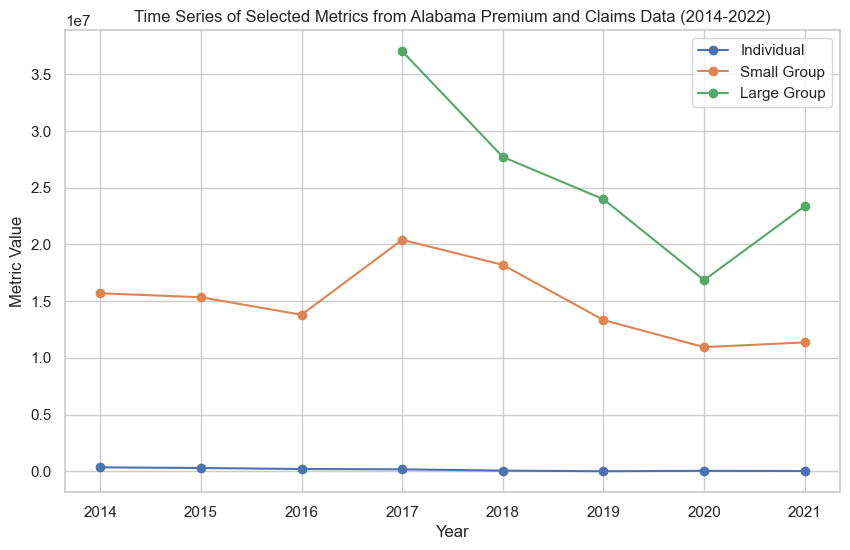

In [97]:
import pandas as pd
import re
import os
import glob
import matplotlib.pyplot as plt

# --- Cleaning Functions ---
def clean_name(name):
    """
    Cleans a single string by:
    - Converting to string (if not already)
    - Stripping leading/trailing whitespace
    - Replacing newline characters with a space
    - Collapsing multiple spaces into one
    """
    if not isinstance(name, str):
        name = str(name)
    name = name.strip()
    name = name.replace('\n', ' ')
    name = re.sub(r'\s+', ' ', name)
    return name

def clean_dataframe_names(df):
    """
    Returns a copy of the DataFrame with cleaned column and index names.
    """
    df = df.copy()
    df.columns = [clean_name(col) for col in df.columns]
    df.index = [clean_name(idx) for idx in df.index]
    return df

# --- Processing Multiple Files and Extracting Metrics ---
data_rows = []
# Assuming files are named "Alabama_2014.xlsx", "Alabama_2015.xlsx", ..., "Alabama_2022.xlsx"
for year in range(2014, 2022):
    filepath = f"./data/Alabama_{year}.xlsx"
    if not os.path.exists(filepath):
        print(f"File {filepath} not found. Skipping year {year}.")
        continue
    try:
        # Read the "Pt 2 Premium and Claims" sheet
        df = pd.read_excel(filepath, sheet_name="Pt 2 Premium and Claims", header=2, index_col=1)
        # Clean up column and row names
        df_clean = clean_dataframe_names(df)
        
        # Extract values by iloc:
        #   df_clean.iloc[1,2] corresponds to "2 Health Insurance INDIVIDUAL Total as of 3/31/15"
        #   df_clean.iloc[1,8] corresponds to "7 Health Insurance SMALL GROUP Total as of 3/31/15"
        #   df_clean.iloc[1,13] corresponds to "12 Health Insurance LARGE GROUP Total as of 3/31/15"
        indiv_val = df_clean.iloc[1, 2]
        small_group_val = df_clean.iloc[1, 8]
        large_group_val = df_clean.iloc[1, 13]
        
        data_rows.append({
            'year': year,
            'individual': indiv_val,
            'small_group': small_group_val,
            'large_group': large_group_val
        })
        print(f"Year {year} processed successfully.")
    except Exception as e:
        print(f"Error processing file for year {year}: {e}")

# Build a time series DataFrame
df_time = pd.DataFrame(data_rows)
df_time = df_time.sort_values('year').reset_index(drop=True)
print("\nTime Series Data:")
print(df_time)

# --- Plotting the Time Series ---
plt.figure(figsize=(10, 6))
plt.plot(df_time['year'], df_time['individual'], marker='o', label='Individual')
plt.plot(df_time['year'], df_time['small_group'], marker='o', label='Small Group')
plt.plot(df_time['year'], df_time['large_group'], marker='o', label='Large Group')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.title('Time Series of Selected Metrics from Alabama Premium and Claims Data (2014-2022)')
plt.legend()
plt.grid(True)
plt.show()


Processed ./data/Alabama_2014.xlsx: 1236438.83, 51682964.17, 179097234.97
Processed ./data/Alabama_2015.xlsx: 1036617.19, 48405885.47, 149425171.23
Processed ./data/Alabama_2016.xlsx: 845993.96, 45911701.4, 130455271.6
Processed ./data/Alabama_2017.xlsx: 684711.76, 34281318.9, 0.0


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Processed ./data/Alabama_2018.xlsx: 509166.77, 44744437.58, 0.0
Processed ./data/Alabama_2019.xlsx: 291228.82, 36998662.01, 0.0
Processed ./data/Alabama_2020.xlsx: 200952.55, 27612928.32, 0.0
Processed ./data/Alabama_2021.xlsx: 126422.67, 23931288.71, 0.0
Processed ./data/Alabama_2022.xlsx: 66088638.72, 16807978.91, 0.0

Time Series Data:
          Metric1      Metric2       Metric3
Year                                        
2014   1236438.83  51682964.17  1.790972e+08
2015   1036617.19  48405885.47  1.494252e+08
2016    845993.96  45911701.40  1.304553e+08
2017    684711.76  34281318.90  0.000000e+00
2018    509166.77  44744437.58  0.000000e+00
2019    291228.82  36998662.01  0.000000e+00
2020    200952.55  27612928.32  0.000000e+00
2021    126422.67  23931288.71  0.000000e+00
2022  66088638.72  16807978.91  0.000000e+00


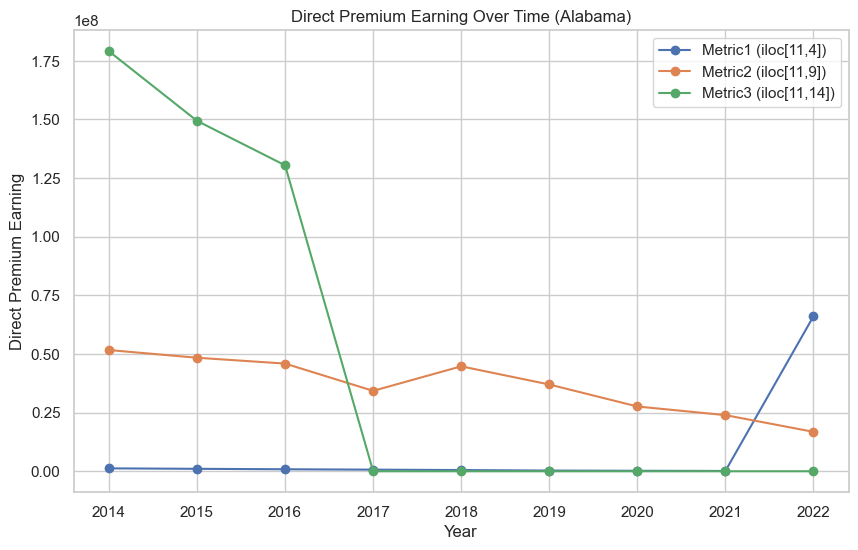

In [124]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# --- Your existing cleaning functions ---
def clean_name(name):
    """
    Cleans a single string by:
    - Converting to string (if not already)
    - Stripping leading/trailing whitespace
    - Replacing newline characters with a space
    - Collapsing multiple spaces into one
    """
    if not isinstance(name, str):
        name = str(name)
    # Remove leading/trailing whitespace
    name = name.strip()
    # Replace newline characters with a space
    name = name.replace('\n', ' ')
    # Collapse multiple spaces into a single space
    name = re.sub(r'\s+', ' ', name)
    return name

def clean_dataframe_names(df):
    """
    Returns a copy of the DataFrame with cleaned column and index names.
    """
    df = df.copy()
    df.columns = [clean_name(col) for col in df.columns]
    df.index = [clean_name(idx) for idx in df.index]
    return df

# --- Loop over files from 2014 to 2022 ---
years = range(2014, 2023)  # 2014 to 2022 inclusive
data_list = []

for year in years:
    filename = f'./data/Alabama_{year}.xlsx'
    try:
        # Read the sheet "Pt 2 Premium and Claims" with header from the 3rd row (header=2)
        df = pd.read_excel(filename, sheet_name="Pt 3 MLR and Rebate Calculation", header=2, index_col=1)
        df_clean = clean_dataframe_names(df)
        
        # Extract the three metrics using iloc:
        #   - df_clean.iloc[11, 4]
        #   - df_clean.iloc[11, 9]
        #   - df_clean.iloc[11, 14]
        val1 = df_clean.iloc[11, 4]
        val2 = df_clean.iloc[11, 9]
        val3 = df_clean.iloc[11, 14]
        
        # Convert to numeric (if necessary); if conversion fails, result will be NaN.
        val1 = pd.to_numeric(val1, errors='coerce')
        val2 = pd.to_numeric(val2, errors='coerce')
        val3 = pd.to_numeric(val3, errors='coerce')
        
        # Append to our list of data with the year and the three metric values.
        data_list.append({
            'Year': year,
            'Metric1': val1,
            'Metric2': val2,
            'Metric3': val3
        })
        print(f"Processed {filename}: {val1}, {val2}, {val3}")
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

# Create a time series DataFrame from our list
df_ts = pd.DataFrame(data_list)
df_ts.set_index('Year', inplace=True)
print("\nTime Series Data:")
print(df_ts)

# --- Plotting the time series ---
plt.figure(figsize=(10, 6))
plt.plot(df_ts.index, df_ts['Metric1'], marker='o', label='Metric1 (iloc[11,4])')
plt.plot(df_ts.index, df_ts['Metric2'], marker='o', label='Metric2 (iloc[11,9])')
plt.plot(df_ts.index, df_ts['Metric3'], marker='o', label='Metric3 (iloc[11,14])')
plt.xlabel('Year')
plt.ylabel('Direct Premium Earning')
plt.title('Direct Premium Earning Over Time (Alabama)')
plt.legend()
plt.grid(True)
plt.show()


In [172]:
import pandas as pd

# Range goes up to (but does not include) the second argument
years = range(2014, 2023)

# We'll collect results in a list of dictionaries, then convert to DataFrame
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    # Read Excel: "Pt 3 MLR and Rebate Calculation" sheet, header=2, index_col=1
    df = pd.read_excel(
        file_name,
        'Pt 3 MLR and Rebate Calculation',
        header=2,
        index_col=1
    )
    
    # Numerators
    numerator_individual   = df.iloc[8,  4]
    numerator_small_group  = df.iloc[8,  9]
    numerator_large_group  = df.iloc[8, 14]
    
    # Denominators
    denominator_individual  = df.iloc[13, 4]
    denominator_small_group = df.iloc[13, 9]
    denominator_large_group = df.iloc[13, 14]  # If your data truly has large group in col 9 as well,
                                               # you can match that. This assumes col 14 is correct.
    
    # Calculate MLR values (handle division by zero safely)
    mlr_ind = (numerator_individual / denominator_individual 
               if denominator_individual else None)
    mlr_sm  = (numerator_small_group / denominator_small_group 
               if denominator_small_group else None)
    mlr_lg  = (numerator_large_group / denominator_large_group 
               if denominator_large_group else None)
    
    # Store each year’s results in a dictionary
    results.append({
        'Year': year,
        'MLR_Individual': mlr_ind,
        'MLR_Small_Group': mlr_sm,
        'MLR_Large_Group': mlr_lg
    })

# Convert list of dicts to a DataFrame for easy display / export
results_df = pd.DataFrame(results)

print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  MLR_Individual  MLR_Small_Group  MLR_Large_Group
0  2014        0.740362         0.813576         0.885101
1  2015        0.718050         0.788001         0.880973
2  2016        0.878374         0.790627         0.904454
3  2017        0.896710         0.898138              NaN
4  2018        1.028013         0.941499              NaN
5  2019        0.815252         0.863313              NaN
6  2020        0.000000         0.000000              NaN
7  2021        0.000000         0.000000              NaN
8  2022        0.000000         0.000000              NaN


In [192]:
    df = pd.read_excel(
        './data/Alabama_2014.xlsx',
        sheet_name='Pt 2 Premium and Claims',
        header=2,       # or whatever row in your Excel is actually the header
        index_col=1  # or index_col=0 if your first column is row labels
    )

In [193]:
df

Unnamed: 0  \
Line Description                                                 
1. Premium                                                 NaN   
1.1 Direct premium written                                 NaN   
1.2 Unearned premium prior year                            NaN   
1.3 Unearned premium MLR Reporting year                    NaN   
1.4 Experience rating refunds (rate credits) paid          NaN   
1.4a Experience rating refunds, with all incurr...         NaN   
1.4b Experience rating refunds associated with ...         NaN   
1.5 Reserve for experience rating refunds (rate...         NaN   
1.6 Reserve for experience rating refunds (rate...         NaN   
1.7 Premium balances written off                           NaN   
1.8 Group conversion charges                               NaN   
1.9 Federal Transitional Reinsurance Program pa...         NaN   
1.10 Federal Risk Adjustment Program net paymen...         NaN   
1.11 Federal Risk Corridors Program net payment...         NaN   
1.12 Premium ceded under 100% reinsurance (info...         NaN   
1.13 Premium assumed under 100% reinsurance (in...         NaN   
1.14 Advance payments of the premium tax credit...         NaN   
2. Claims                                                  NaN   
2.1 Claims Paid                                            NaN   
2.1a  Claims paid during the MLR reporting year...         NaN   
2.1b  Claims incurred only during the MLR repor...         NaN   
2.2 Direct claim liability                                 NaN   
2.2a Liability as of 12/31 of MLR reporting yea...         NaN   
2.2b Liability for claims incurred only during ...         NaN   
2.3 Direct claim liability prior year                      NaN   
2.4 Direct claim reserves                                  NaN   
2.4a Reserves as of 12/31 of MLR reporting year...         NaN   
2.4b Reserves for claims incurred only during t...         NaN   
2.5 Direct claim reserves prior year                       NaN   
2.6 Direct contract reserves                               NaN   
2.6a Direct contract reserves 12/31 column                 NaN   
2.6b Direct contract reserves 3/31, dual contra...         NaN   
2.7 Direct contract reserves prior year                    NaN   
2.8 Experience rating refunds (rate credits) paid          NaN   
2.8a Experience rating refunds, with all incurr...         NaN   
2.8b Experience rating refunds associated with ...         NaN   
2.9 Reserve for experience rating refunds (rate...         NaN   
2.9a Reserved in MLR reporting year regardless ...         NaN   
2.9b Reserves specific to the MLR reporting yea...         NaN   
2.10 Reserve for experience rating refunds (rat...         NaN   
2.11 Incurred medical incentive pool and bonuses           NaN   
2.11a  Paid medical incentive pools and bonuses...         NaN   
2.11b  Accrued medical incentive pools and bonu...         NaN   
2.11c  Accrued medical incentive pools and bonu...         NaN   
2.12 Net healthcare receivables                            NaN   
2.12a  Healthcare receivables MLR Reporting year           NaN   
2.12b  Healthcare receivables prior year                   NaN   
2.13 Contingent benefit and lawsuit reserves               NaN   
2.14 Group conversion charges                              NaN   
2.15 Blended rate adjustment                               NaN   
2.16 Total incurred claims                                 NaN   
2.17 Allowable fraud reduction expense (the sma...         NaN   
2.17a  Total fraud reduction expense                       NaN   
2.17b  Total fraud recoveries that reduced paid...         NaN   
2.18 Advance payments of cost-sharing reductions           NaN   

                                                                                        SHCE  \
Line Description                                                                               
1. Premium                                                                               NaN   
1

In [194]:
import pandas as pd

# Years from 2014 to 2022 (range end is exclusive, so 2023 is not included)
years = range(2014, 2023)

# Collect results in a list of dictionaries
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    # Read Excel
    # If your row with column headers is different, adjust 'header=' accordingly
    # Also, if you have row labels you want as an index, you could set index_col=...
    df = pd.read_excel(
        file_name,
        sheet_name='Pt 2 Premium and Claims',
        header=2,       # or whatever row in your Excel is actually the header
        index_col=1  # or index_col=0 if your first column is row labels
    )
    
    # -- Individual Coverage --
    premium_individual      = df.iloc[1, 3]   # df_clean.iloc[1,3] from your note
    incurred_individual     = df.iloc[50, 3]  # df_clean.iloc[50,3]
    ratio_individual        = (incurred_individual / premium_individual 
                              if premium_individual else None)
    
    # -- Small Group Coverage --
    # Assuming same rows, but offset columns
    premium_small_group     = df.iloc[1, 8]
    incurred_small_group    = df.iloc[50, 8]
    ratio_small_group       = (incurred_small_group / premium_small_group 
                              if premium_small_group else None)
    
    # -- Large Group Coverage --
    premium_large_group     = df.iloc[1, 13]
    incurred_large_group    = df.iloc[50, 13]
    ratio_large_group       = (incurred_large_group / premium_large_group 
                              if premium_large_group else None)
    
    # Store each year’s results in a dictionary
    results.append({
        'Year': year,
        'Premium_Ind': premium_individual,
        'Incurred_Ind': incurred_individual,
        'Claims/Prem_Individual': ratio_individual,
        
        'Premium_SG': premium_small_group,
        'Incurred_SG': incurred_small_group,
        'Claims/Prem_SmallGroup': ratio_small_group,
        
        'Premium_LG': premium_large_group,
        'Incurred_LG': incurred_large_group,
        'Claims/Prem_LargeGroup': ratio_large_group,
    })

# Convert list of dicts to a DataFrame
results_df = pd.DataFrame(results)

print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  Premium_Ind  Incurred_Ind  Claims/Prem_Individual   Premium_SG  \
0  2014    345343.28     213507.56                0.618247  15690512.23   
1  2015    283446.31     172189.06                0.607484  15341274.76   
2  2016    218499.87     182329.89                0.834462  13795814.46   
3  2017    183781.62     106443.89                0.579187  20403786.05   
4  2018    107686.99      66154.47                0.614322  18195161.98   
5  2019     65713.38          0.00                0.000000  13331094.45   
6  2020     42000.86          0.00                0.000000  10944185.22   
7  2021     18708.43          0.00                0.000000  11361800.68   
8  2022  66027929.43          0.00                0.000000  11565821.97   

   Incurred_SG  Claims/Prem_SmallGroup   Premium_LG  Incurred_LG  \
0  11014800.44                0.702004          NaN          NaN   
1   9725207.75                0.633924          NaN          NaN   
2  10753361.02                0.779465       

In [195]:
results_df

Year  Premium_Ind  Incurred_Ind  Claims/Prem_Individual   Premium_SG  \
0  2014    345343.28     213507.56                0.618247  15690512.23   
1  2015    283446.31     172189.06                0.607484  15341274.76   
2  2016    218499.87     182329.89                0.834462  13795814.46   
3  2017    183781.62     106443.89                0.579187  20403786.05   
4  2018    107686.99      66154.47                0.614322  18195161.98   
5  2019     65713.38          0.00                0.000000  13331094.45   
6  2020     42000.86          0.00                0.000000  10944185.22   
7  2021     18708.43          0.00                0.000000  11361800.68   
8  2022  66027929.43          0.00                0.000000  11565821.97   

   Incurred_SG  Claims/Prem_SmallGroup   Premium_LG  Incurred_LG  \
0  11014800.44                0.702004          NaN          NaN   
1   9725207.75                0.633924          NaN          NaN   
2  10753361.02                0.779465          NaN          NaN   
3  16394847.68                0.803520  37027297.08  30621338.76   
4  12163606.64                0.668508  27711529.86  21054941.95   
5         0.00                0.000000  23979710.09         0.00   
6         0.00                0.000000  16847599.61         0.00   
7         0.00                0.000000  23380141.55         0.00   
8         0.00                0.000000  58807562.64         0.00   

   Claims/Prem_LargeGroup  
0                     NaN  
1                     NaN  
2                     NaN  
3                0.826994  
4                0.759790  
5                0.000000  
6                0.000000  
7                0.000000  
8                0.000000

In [197]:
df

Unnamed: 0  \
Line Description                                                                       
1. Medical Loss Ratio Numerator                                                  NaN   
1.1 Adjusted incurred claims as reported on MLR...               ADJ_INCURRED_CLAIMS   
1.2 Adjusted incurred claims as of 3/31 of the ...   ADJ_INCURRED_CLAIMS_RESTATED_Q1   
1.3 Improving Health Care Quality Expenses              QUALITY_IMPROVEMENT_EXPENSES   
1.4 Reconciled payments of cost-sharing reductions              ADVANCE_PAYMENTS_CSR   
1.5 Federal Transitional Reinsurance Program pa...            FED_REINS_PAYMENTS_HHS   
1.6 Federal Risk Adjustment Program net payment...     FED_RISK_ADJ_NET_PAYMENTS_HHS   
1.7 Reserved                                          FED_RISK_CORR_NET_PAYMENTS_HHS   
1.8 Shared Savings payments to enrollees                              SHARED_SAVINGS   
1.9 MLR numerator                                                      MLR_NUMERATOR   
2. Medical Loss Ratio Denominator                                                NaN   
2.1 Premium earned including Federal and State ...    PREMIUM_EARNED_INCLUDING_FSHRP   
2.2 Federal and State taxes and licensing or re...    FED_STATE_TAXES_LIC_OR_REG_FEE   
2.3 MLR Denominator (Lines 2.1 - 2.2)                                MLR_DENOMINATOR   
3. Credibility Adjustment                                                        NaN   
3.1 Life-years                                          LIFE_YEARS_TO_DETERMINE_CRED   
3.2 Base credibility factor                                  BASE_CREDIBILITY_FACTOR   
3.3 Average deductible                                            AVERAGE_DEDUCTIBLE   
3.4 Deductible factor                                              DEDUCTIBLE_FACTOR   
3.5 Credibility adjustment (Lines 3.2 x 3.4 (do...     CREDIBILITY_ADJUSTMENT_FACTOR   
4. MLR Calculation (for issuers with at least 1...                               NaN   
4.1  Preliminary MLR (Lines 1.9 / 2.3)                               PRELIMINARY_MLR   
4.2 Credibility adjustment (Line 3.5, if applic...      CREDIBILITY_ADJ_FACTOR_LN3_5   
4.3 Credibility-adjusted MLR (Lines 4.1 + 4.2)              CREDIBILITY_ADJUSTED_MLR   
5. Rebate Calculation                                                            NaN   
5.1 MLR standard                                                        MLR_STANDARD   
5.2 Credibility-adjusted MLR (Line 4.3)               CREDIBILITY_ADJUSTED_MLR_LN4_4   
5.3 Adjusted earned premium (Lines 2.1 - 2.2 CY)      ADJ_EARNED_PREMIUM_LIC_REG_FEE   
5.4 Rebate amount if credibility-adjusted MLR i...    REBATE_AMT_CREDIBILITY_ADJ_MLR   
5.5 Optional: single-year rebate liability (Lin...            REBATE_LIABILITY_TOTAL   
5.6 Optional: paid rebate liability (see instru...             REBATE_LIABILITY_PAID   
5.7 Optional: unpaid rebate liability (Lines 5....           REBATE_LIABILITY_UNPAID   
5.8 Limited payable rebate amount (see instruct...                REBATE_AMT_LIMITED   
6. Temporary Adjustments                                                         NaN   
6.1  Reserved for future use                                                     NaN   
6.1a  Reserved for future use                                       DEFFERED_PRM_ACA   
6.1b  Reserved for future use                                       DEFFERED_TAX_ACA   
6.2   Reserved for future use                                     RC_CLM_LIAB_TRUEUP   
6.2a  Reserved for future use                              RC_ADJ_INCURRED_CLAIMS_PY   
6.2b  Reserved for future use                       RC_ADJ_INC_CLAIMS_PY_RESTATED_Q1   
6.2c  Reserved for future use                         TP_PREMIUM_EARNED_INCLUD_FSHRP   
6.2d  Reserved for future use                         TP_FED_STATE_TAXES_LIC_REG_FEE   
6.2e  Reserved for future use                                          TP_LIFE_YEARS   
6.2f  Reserved for future use                                       TP_COVERED_LIVES   

                         

In [209]:
import pandas as pd
import numpy as np

def safe_divide(numerator, denominator):
    """
    Returns the division of numerator by denominator.
    If denominator is zero or either value is NaN, returns np.nan.
    """
    try:
        if pd.isnull(numerator) or pd.isnull(denominator) or denominator == 0:
            return np.nan
        return numerator / denominator
    except Exception:
        return np.nan

years = range(2014, 2023)
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    # Read the Excel sheet using row 2 as header and first column as index.
    df = pd.read_excel(
        file_name,
        sheet_name='Pt 2 Premium and Claims',
        header=2,
        index_col=1
    )
    
    # Ensure the index is all strings (handling NaNs or non-string entries)
    df.index = df.index.fillna("").astype(str)
    
    # Find the row where the index contains "total incurred claims" (case-insensitive)
    row_matches = df.index[df.index.str.lower().str.contains("total incurred claims")]
    
    if len(row_matches) == 0:
        # If no match is found, assign NaN values.
        incurred_individual = np.nan
        incurred_small_group = np.nan
        incurred_large_group = np.nan
    else:
        matched_row = row_matches[0]
        row_idx = df.index.get_loc(matched_row)
        # Retrieve incurred claim values for each market segment (adjust column indices if needed)
        incurred_individual = df.iloc[row_idx, 3]
        incurred_small_group = df.iloc[row_idx, 8]
        incurred_large_group = df.iloc[row_idx, 13]
    
    # Retrieve premium values from row 1 for each market segment
    premium_individual = df.iloc[1, 3]
    premium_small_group = df.iloc[1, 8]
    premium_large_group = df.iloc[1, 13]
    
    # Compute ratios safely
    ratio_individual = safe_divide(incurred_individual, premium_individual)
    ratio_small_group = safe_divide(incurred_small_group, premium_small_group)
    ratio_large_group = safe_divide(incurred_large_group, premium_large_group)
    
    # Append the results for this year
    results.append({
        'Year': year,
        'Premium_Ind': premium_individual,
        'Incurred_Ind': incurred_individual,
        'Claims/Prem_Individual': ratio_individual,
        'Premium_SG': premium_small_group,
        'Incurred_SG': incurred_small_group,
        'Claims/Prem_SmallGroup': ratio_small_group,
        'Premium_LG': premium_large_group,
        'Incurred_LG': incurred_large_group,
        'Claims/Prem_LargeGroup': ratio_large_group
    })

results_df = pd.DataFrame(results)
print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  Premium_Ind  Incurred_Ind  Claims/Prem_Individual   Premium_SG  \
0  2014    345343.28     213507.56                0.618247  15690512.23   
1  2015    283446.31     172189.06                0.607484  15341274.76   
2  2016    218499.87     182329.89                0.834462  13795814.46   
3  2017    183781.62     106443.89                0.579187  20403786.05   
4  2018    107686.99      66154.47                0.614322  18195161.98   
5  2019     65713.38      46308.75                0.704708  13331094.45   
6  2020     42000.86      29013.93                0.690794  10944185.22   
7  2021     18708.43      12696.42                0.678647  11361800.68   
8  2022  66027929.43   30190354.12                0.457236  11565821.97   

   Incurred_SG  Claims/Prem_SmallGroup   Premium_LG  Incurred_LG  \
0  11014800.44                0.702004          NaN          NaN   
1   9725207.75                0.633924          NaN          NaN   
2  10753361.02                0.779465       

In [210]:
df

Unnamed: 0  \
Line Description                                                                      
1. Premium                                                                      NaN   
1.1 Direct premium written                                   DIRECT_PREMIUM_WRITTEN   
1.2 Unearned premium prior year                         UNEARNED_PREMIUM_PRIOR_YEAR   
1.3 Unearned premium MLR Reporting year               UNEARNED_PREMIUM_CURRENT_YEAR   
1.4 Experience rating refunds (rate credits) paid                               NaN   
1.4a Experience rating refunds, with all incurr...   EXP_RATING_REFUNDS_PAID_REP_YR   
1.4b Experience rating refunds associated with ...    EXP_RATING_REFUNDS_PAID_YR_Q1   
1.5 Reserve for experience rating refunds (rate...      PRE_RES_EXP_RAT_REF_CURR_YR   
1.6 Reserve for experience rating refunds (rate...     PRE_RES_EXP_RAT_REF_PRIOR_YR   
1.7 Premium balances written off                       PREMIUM_BALANCES_WRITTEN_OFF   
1.8 Group conversion charges                           PRE_GROUP_CONVERSION_CHARGES   
1.9 Federal Transitional Reinsurance Program pa...               FED_REINS_PAYMENTS   
1.10 Federal Risk Adjustment Program net paymen...        FED_RISK_ADJ_NET_PAYMENTS   
1.11 Reserved                                            FED_RISK_CORR_NET_PAYMENTS   
1.12 Premium ceded under 100% reinsurance (info...       PREM_CEDED_UNDER_100_REINS   
1.13 Premium assumed under 100% reinsurance (in...     PREM_ASSUMED_UNDER_100_REINS   
1.14 Advance payments of the premium tax credit...                             APTC   
2. Claims                                                                       NaN   
2.1 Claims Paid                                                                 NaN   
2.1a  Claims paid during the MLR reporting year...   CLM_ALL_INCU_DATES_PAID_REP_YR   
2.1b  Claims incurred only during the MLR repor...       CLM_INC_REP_YR_AND_FOLL_YR   
2.2 Direct claim liability                                                      NaN   
2.2a Liability as of 12/31 of MLR reporting yea...      DIR_CLAIM_LIABILITY_CURR_YR   
2.2b Liability for claims incurred only during ...           DIR_CLAIM_LIABILITY_Q1   
2.3 Direct claim liability prior year                  DIR_CLAIM_LIABILITY_PRIOR_YR   
2.4 Direct claim reserves                                                       NaN   
2.4a Reserves as of 12/31 of MLR reporting year...       DIR_CLAIM_RESERVES_CURR_YR   
2.4b Reserves for claims incurred only during t...            DIR_CLAIM_RESERVES_Q1   
2.5 Direct claim reserves prior year                    DIR_CLAIM_RESERVES_PRIOR_YR   
2.6 Direct contract reserves                                                    NaN   
2.6a Direct contract reserves 12/31 column            DIR_CONTRACT_RESERVES_CURR_YR   
2.6b Direct contract reserves 3/31, dual contra...         DIR_CONTRACT_RESERVES_Q1   
2.7 Direct contract reserves prior year              DIR_CONTRACT_RESERVES_PRIOR_YR   
2.8 Experience rating refunds (rate credits) paid                               NaN   
2.8a Experience rating refunds, with all incurr...  EXP_RAT_REFUNDS_INC_DATE_REP_YR   
2.8b Experience rating refunds associated with ...   EXP_RAT_REF_INC_REP_YR_FOLL_YR   
2.9 Reserve for experience rating refunds (rate...                              NaN   
2.9a Reserved in MLR reporting year regardless ...      RES_EXP_RAT_REFUNDS_CURR_YR   
2.9b Reserves specific to the MLR reporting yea...           RES_EXP_RAT_REFUNDS_Q1   
2.10 Reserve for experience rating refunds (rat...     RES_EXP_RAT_REFUNDS_PRIOR_YR   
2.11 Incurred medical incentive pool and bonuses                                NaN   
2.11a  Paid medical incentive pools and bonuses...   PAID_MED_INC_POOLS_BON_CURR_YR   
2.11b  Accrued medical incentive pools and bonu...    ACC_MED_INC_POOLS_BON_CURR_YR   
2.11c  Accrued medical incentive pools and bonu...   ACC_MED_INC_POOLS_BON_PRIOR_YR   
2.12 Net healthcare receivables                                        

In [228]:
import pandas as pd
import numpy as np

def safe_divide(numerator, denominator):
    """
    Safely divides numerator by denominator.
    Returns np.nan if denominator is zero, or if either value is NaN.
    """
    try:
        if pd.isnull(numerator) or pd.isnull(denominator) or denominator == 0:
            return np.nan
        return numerator / denominator
    except Exception:
        return np.nan

years = range(2014, 2023)
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    df = pd.read_excel(
        file_name,
        sheet_name='Pt 2 Premium and Claims',
        header=2,
        index_col=1
    )
    
    # Ensure the index is all strings so we can search it
    df.index = df.index.fillna("").astype(str)
    
    # Find the row that contains "claims paid" (case-insensitive)
    row_matches = df.index[df.index.str.lower().str.contains("claims paid during")]
    
    if len(row_matches) == 0:
        # No match found: set claims paid values as NaN
        claims_paid_ind = np.nan
        claims_paid_sg = np.nan
        claims_paid_lg = np.nan
    else:
        matched_row = row_matches[0]
        row_idx = df.index.get_loc(matched_row)
        # Adjust these column indices based on your layout
        claims_paid_ind = df.iloc[row_idx, 2]
        claims_paid_sg = df.iloc[row_idx, 7]
        claims_paid_lg = df.iloc[row_idx, 12]
    
    # Premium values from row 1 (for example)
    premium_ind = df.iloc[1, 2]
    premium_sg = df.iloc[1, 7]
    premium_lg = df.iloc[1, 12]
    
    # Calculate the paid loss ratios safely
    paid_loss_ratio_ind = safe_divide(claims_paid_ind, premium_ind)
    paid_loss_ratio_sg = safe_divide(claims_paid_sg, premium_sg)
    paid_loss_ratio_lg = safe_divide(claims_paid_lg, premium_lg)
    
    results.append({
        'Year': year,
        'Premium_Ind': premium_ind,
        'ClaimsPaid_Ind': claims_paid_ind,
        'PaidLossRatio_Ind': paid_loss_ratio_ind,
        'Premium_SG': premium_sg,
        'ClaimsPaid_SG': claims_paid_sg,
        'PaidLossRatio_SG': paid_loss_ratio_sg,
        'Premium_LG': premium_lg,
        'ClaimsPaid_LG': claims_paid_lg,
        'PaidLossRatio_LG': paid_loss_ratio_lg
    })

results_df = pd.DataFrame(results)
print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  Premium_Ind  ClaimsPaid_Ind  PaidLossRatio_Ind   Premium_SG  \
0  2014    345271.28       204789.55           0.593127          NaN   
1  2015    288044.31       452515.39           1.570992          NaN   
2  2016    198340.25       670862.98           3.382384          NaN   
3  2017    171877.60        82397.20           0.479395  20833475.41   
4  2018     58513.48        94800.33           1.620145  17096412.39   
5  2019      2092.16        36325.89          17.362864  14001496.47   
6  2020     40475.63       164263.06           4.058320  11913180.54   
7  2021     20233.66       -14363.48          -0.709880  11439489.89   
8  2022  58768430.65     25369137.02           0.431680  10904319.48   

   ClaimsPaid_SG  PaidLossRatio_SG   Premium_LG  ClaimsPaid_LG  \
0            NaN               NaN         0.00            NaN   
1            NaN               NaN         0.00            NaN   
2            NaN               NaN         0.00            NaN   
3    16373353.1

In [227]:
df

Unnamed: 0  \
Line Description                                                                      
1. Premium                                                                      NaN   
1.1 Direct premium written                                   DIRECT_PREMIUM_WRITTEN   
1.2 Unearned premium prior year                         UNEARNED_PREMIUM_PRIOR_YEAR   
1.3 Unearned premium MLR Reporting year               UNEARNED_PREMIUM_CURRENT_YEAR   
1.4 Experience rating refunds (rate credits) paid                               NaN   
1.4a Experience rating refunds, with all incurr...   EXP_RATING_REFUNDS_PAID_REP_YR   
1.4b Experience rating refunds associated with ...    EXP_RATING_REFUNDS_PAID_YR_Q1   
1.5 Reserve for experience rating refunds (rate...      PRE_RES_EXP_RAT_REF_CURR_YR   
1.6 Reserve for experience rating refunds (rate...     PRE_RES_EXP_RAT_REF_PRIOR_YR   
1.7 Premium balances written off                       PREMIUM_BALANCES_WRITTEN_OFF   
1.8 Group conversion charges                           PRE_GROUP_CONVERSION_CHARGES   
1.9 Federal Transitional Reinsurance Program pa...               FED_REINS_PAYMENTS   
1.10 Federal Risk Adjustment Program net paymen...        FED_RISK_ADJ_NET_PAYMENTS   
1.11 Reserved                                            FED_RISK_CORR_NET_PAYMENTS   
1.12 Premium ceded under 100% reinsurance (info...       PREM_CEDED_UNDER_100_REINS   
1.13 Premium assumed under 100% reinsurance (in...     PREM_ASSUMED_UNDER_100_REINS   
1.14 Advance payments of the premium tax credit...                             APTC   
2. Claims                                                                       NaN   
2.1 Claims Paid                                                                 NaN   
2.1a  Claims paid during the MLR reporting year...   CLM_ALL_INCU_DATES_PAID_REP_YR   
2.1b  Claims incurred only during the MLR repor...       CLM_INC_REP_YR_AND_FOLL_YR   
2.2 Direct claim liability                                                      NaN   
2.2a Liability as of 12/31 of MLR reporting yea...      DIR_CLAIM_LIABILITY_CURR_YR   
2.2b Liability for claims incurred only during ...           DIR_CLAIM_LIABILITY_Q1   
2.3 Direct claim liability prior year                  DIR_CLAIM_LIABILITY_PRIOR_YR   
2.4 Direct claim reserves                                                       NaN   
2.4a Reserves as of 12/31 of MLR reporting year...       DIR_CLAIM_RESERVES_CURR_YR   
2.4b Reserves for claims incurred only during t...            DIR_CLAIM_RESERVES_Q1   
2.5 Direct claim reserves prior year                    DIR_CLAIM_RESERVES_PRIOR_YR   
2.6 Direct contract reserves                                                    NaN   
2.6a Direct contract reserves 12/31 column            DIR_CONTRACT_RESERVES_CURR_YR   
2.6b Direct contract reserves 3/31, dual contra...         DIR_CONTRACT_RESERVES_Q1   
2.7 Direct contract reserves prior year              DIR_CONTRACT_RESERVES_PRIOR_YR   
2.8 Experience rating refunds (rate credits) paid                               NaN   
2.8a Experience rating refunds, with all incurr...  EXP_RAT_REFUNDS_INC_DATE_REP_YR   
2.8b Experience rating refunds associated with ...   EXP_RAT_REF_INC_REP_YR_FOLL_YR   
2.9 Reserve for experience rating refunds (rate...                              NaN   
2.9a Reserved in MLR reporting year regardless ...      RES_EXP_RAT_REFUNDS_CURR_YR   
2.9b Reserves specific to the MLR reporting yea...           RES_EXP_RAT_REFUNDS_Q1   
2.10 Reserve for experience rating refunds (rat...     RES_EXP_RAT_REFUNDS_PRIOR_YR   
2.11 Incurred medical incentive pool and bonuses                                NaN   
2.11a  Paid medical incentive pools and bonuses...   PAID_MED_INC_POOLS_BON_CURR_YR   
2.11b  Accrued medical incentive pools and bonu...    ACC_MED_INC_POOLS_BON_CURR_YR   
2.11c  Accrued medical incentive pools and bonu...   ACC_MED_INC_POOLS_BON_PRIOR_YR   
2.12 Net healthcare receivables                                        

In [229]:
import pandas as pd
import numpy as np

def safe_divide(numerator, denominator):
    """
    Safely divides numerator by denominator.
    Returns np.nan if denominator is zero, or if either value is NaN.
    """
    try:
        if pd.isnull(numerator) or pd.isnull(denominator) or denominator == 0:
            return np.nan
        return numerator / denominator
    except Exception:
        return np.nan

years = range(2014, 2023)
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    df = pd.read_excel(
        file_name,
        sheet_name='Pt 2 Premium and Claims',
        header=2,
        index_col=1
    )
    
    # Ensure the index is all strings so we can search it
    df.index = df.index.fillna("").astype(str)
    
    # Find the row that contains "claims paid during" (case-insensitive)
    row_matches = df.index[df.index.str.lower().str.contains("claims paid during")]
    
    if len(row_matches) == 0:
        # No match found: set claims paid values as NaN
        claims_paid_ind = np.nan
        claims_paid_sg = np.nan
        claims_paid_lg = np.nan
    else:
        matched_row = row_matches[0]
        row_idx = df.index.get_loc(matched_row)
        # Adjust these column indices based on your layout
        claims_paid_ind = df.iloc[row_idx, 2]
        claims_paid_sg = df.iloc[row_idx, 7]
        claims_paid_lg = df.iloc[row_idx, 12]
    
    # Premium values from row 1 for each market segment
    premium_ind = df.iloc[1, 2]
    premium_sg = df.iloc[1, 7]
    premium_lg = df.iloc[1, 12]
    
    # Try to get the "Experience rating refunds" from row 5.
    # If the cell is missing or NaN, default to 0.
    try:
        refund_ind = df.iloc[5, 2]
        if pd.isnull(refund_ind):
            refund_ind = 0
    except Exception:
        refund_ind = 0

    try:
        refund_sg = df.iloc[5, 7]
        if pd.isnull(refund_sg):
            refund_sg = 0
    except Exception:
        refund_sg = 0

    try:
        refund_lg = df.iloc[5, 12]
        if pd.isnull(refund_lg):
            refund_lg = 0
    except Exception:
        refund_lg = 0

    # Adjust the premium earned by adding back (i.e., subtracting the negative refund).
    # Typically, the refund is a negative number, so subtracting it effectively adds its absolute value.
    adjusted_premium_ind = premium_ind - refund_ind
    adjusted_premium_sg = premium_sg - refund_sg
    adjusted_premium_lg = premium_lg - refund_lg

    # Calculate the paid loss ratios using the original premium earned
    paid_loss_ratio_ind = safe_divide(claims_paid_ind, premium_ind)
    paid_loss_ratio_sg = safe_divide(claims_paid_sg, premium_sg)
    paid_loss_ratio_lg = safe_divide(claims_paid_lg, premium_lg)
    
    # Optionally, you could also calculate loss ratios using the adjusted premium:
    adjusted_paid_loss_ratio_ind = safe_divide(claims_paid_ind, adjusted_premium_ind)
    adjusted_paid_loss_ratio_sg = safe_divide(claims_paid_sg, adjusted_premium_sg)
    adjusted_paid_loss_ratio_lg = safe_divide(claims_paid_lg, adjusted_premium_lg)
    
    results.append({
        'Year': year,
        'Premium_Ind': premium_ind,
        'Refund_Ind': refund_ind,
        'Adjusted_Premium_Ind': adjusted_premium_ind,
        'ClaimsPaid_Ind': claims_paid_ind,
        'PaidLossRatio_Ind': paid_loss_ratio_ind,
        'Adj_PaidLossRatio_Ind': adjusted_paid_loss_ratio_ind,
        
        'Premium_SG': premium_sg,
        'Refund_SG': refund_sg,
        'Adjusted_Premium_SG': adjusted_premium_sg,
        'ClaimsPaid_SG': claims_paid_sg,
        'PaidLossRatio_SG': paid_loss_ratio_sg,
        'Adj_PaidLossRatio_SG': adjusted_paid_loss_ratio_sg,
        
        'Premium_LG': premium_lg,
        'Refund_LG': refund_lg,
        'Adjusted_Premium_LG': adjusted_premium_lg,
        'ClaimsPaid_LG': claims_paid_lg,
        'PaidLossRatio_LG': paid_loss_ratio_lg,
        'Adj_PaidLossRatio_LG': adjusted_paid_loss_ratio_lg
    })

results_df = pd.DataFrame(results)
print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  Premium_Ind  Refund_Ind  Adjusted_Premium_Ind  ClaimsPaid_Ind  \
0  2014    345271.28    17221.10             328050.18       204789.55   
1  2015    288044.31  -146715.53             434759.84       452515.39   
2  2016    198340.25  -484862.63             683202.88       670862.98   
3  2017    171877.60     3339.06             168538.54        82397.20   
4  2018     58513.48    -7723.46              66236.94        94800.33   
5  2019      2092.16    35978.58             -33886.42        36325.89   
6  2020     40475.63  -159021.42             199497.05       164263.06   
7  2021     20233.66   108199.32             -87965.66       -14363.48   
8  2022  58768430.65     -454.99           58768885.64     25369137.02   

   PaidLossRatio_Ind  Adj_PaidLossRatio_Ind   Premium_SG  Refund_SG  \
0           0.593127               0.624263          NaN        0.0   
1           1.570992               1.040840          NaN        0.0   
2           3.382384               0.981938   